# Predicting Travel Insurance

The file provides the analysis of the Travel Insurance dataset which is imported from the Kaggle repository https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data. In order to test its new product, the travel insurance package, a travel agency company offered the travel insurance package to some of its customers and the data has been extracted from the performance/ sales of the package during the period of the year 2019. The dataset includes a sample of 2000 customers of the travel agency company and provides data on the following variables:

- Age - age of the customer;
- Employment Type - the sector in which customer is employed;
- GraduateOrNot - whether the customer is college graduate or not;
- AnnualIncome - the yearly income of the customer in indian rupees;
- FamilyMembers - number of members in customer's family;
- ChronicDisease - whether the customer suffers from any major disease or conditions like diabetes/high bp or asthama,etc;
- FrequentFlyer - derived data based on customer's history of booking air tickets on atleast 4 different instances in the years 2017 - 2019;
- EverTravelledAbroad - has the customer ever travelled to a foreign country;
- TravelInsurance - did the customer buy travel insurance package during introductory offering held in the year 2019.

The purpose of the analysis is to predict which customers would be interested to buy the travel insurance package. 

Additional objectives of the analysis are:
- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

The analysis consists of several parts: 1) exploratory analysis of the Travel Insurance dataset, 2) inferences about the statistical significance of differences among groups of customers, 3) training, testing, tuning and evaluating of machine learning models which could explain factors affecting a decision to buy the travel insurance package.

## 1. Exploratory Data Analysis (EDA)

The first step of the analysis is to import data from the Kaggle website and to import Python libraries which will be used for the analysis. 

### Importing libraries

The main libraries which will be used for the manipulation with data are pandas and numpy. Matplotlib, seaborn and yellowbrick will be used for data visualization. Scipy, Statsmodels, Researchpy, Math, Random will be used for conducting statistical tests, calculating confidence intervals. Sklearn will be used for spliting data into training and testing samples, building and testing machine learning models.


In [1]:
import numpy as np 
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from scipy import stats as st
from scipy.stats import chi2_contingency, norm 
import researchpy as rp

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import optuna

import sklearn
import sklearn.ensemble
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
import xgboost as xg
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import joblib

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier import roc_auc
from yellowbrick.classifier import confusion_matrix


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Importing data and examining variables

The travel insurance quality dataset is imported and saved into pandas dataframe.

In [2]:
tinsurance = pd.read_csv("TravelInsurancePrediction.csv")

By examining the dataframe, it was found that it contains 9 columns (8 customer characteristics and a target variable column with info about the decision to buy or not to buy the travel insurance package) and 1987 rows (data on difference customers). The columns Age, AnnualIncome, FamilyMembers are discrete numerical variables (integers) and columns Emplyment Type, ChronicDiseases, FrequenfFlyer, EverTravelledAbroad are categorical variables.

In [3]:
tinsurance.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
tinsurance = tinsurance.drop(columns=["Unnamed: 0"])

In [5]:
tinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


### Examining individual variables, checking for missing values and outliers

After checking the columns for missing values, it is found that there are no missing values in the dataframe.

In [6]:
tinsurance.isnull().sum() #checking for total null values

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

It was also found that there are no outliers in the dataframe.

In [7]:
find_outliers(tinsurance, 0, 1.5)
find_outliers(tinsurance, 3, 1.5)
find_outliers(tinsurance, 4, 1.5)

NameError: name 'find_outliers' is not defined

#### Numerical variables:

Next, numerical variables were examined by the function "describe". It can be seen that are differently scaled, thus it is need to scale them. The variables were plotted and it was found from the plot that only family members variable are normally distributed. Customers who are included in the dataset are in the range of age from 25 to 35 years, tehy have annual income from 300 000 to 1800 000 rupees. Average number of family members in the dataset of customers is 4.9.

In [8]:
tinsurance['Age'].describe()

count    1987.000000
mean       29.650226
std         2.913308
min        25.000000
25%        28.000000
50%        29.000000
75%        32.000000
max        35.000000
Name: Age, dtype: float64

In [9]:
tinsurance['FamilyMembers'].describe()

count    1987.000000
mean        4.752894
std         1.609650
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: FamilyMembers, dtype: float64

In [10]:
tinsurance['AnnualIncome'].describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

Text(0.5, 1.0, 'Distribution by numbers of family members')

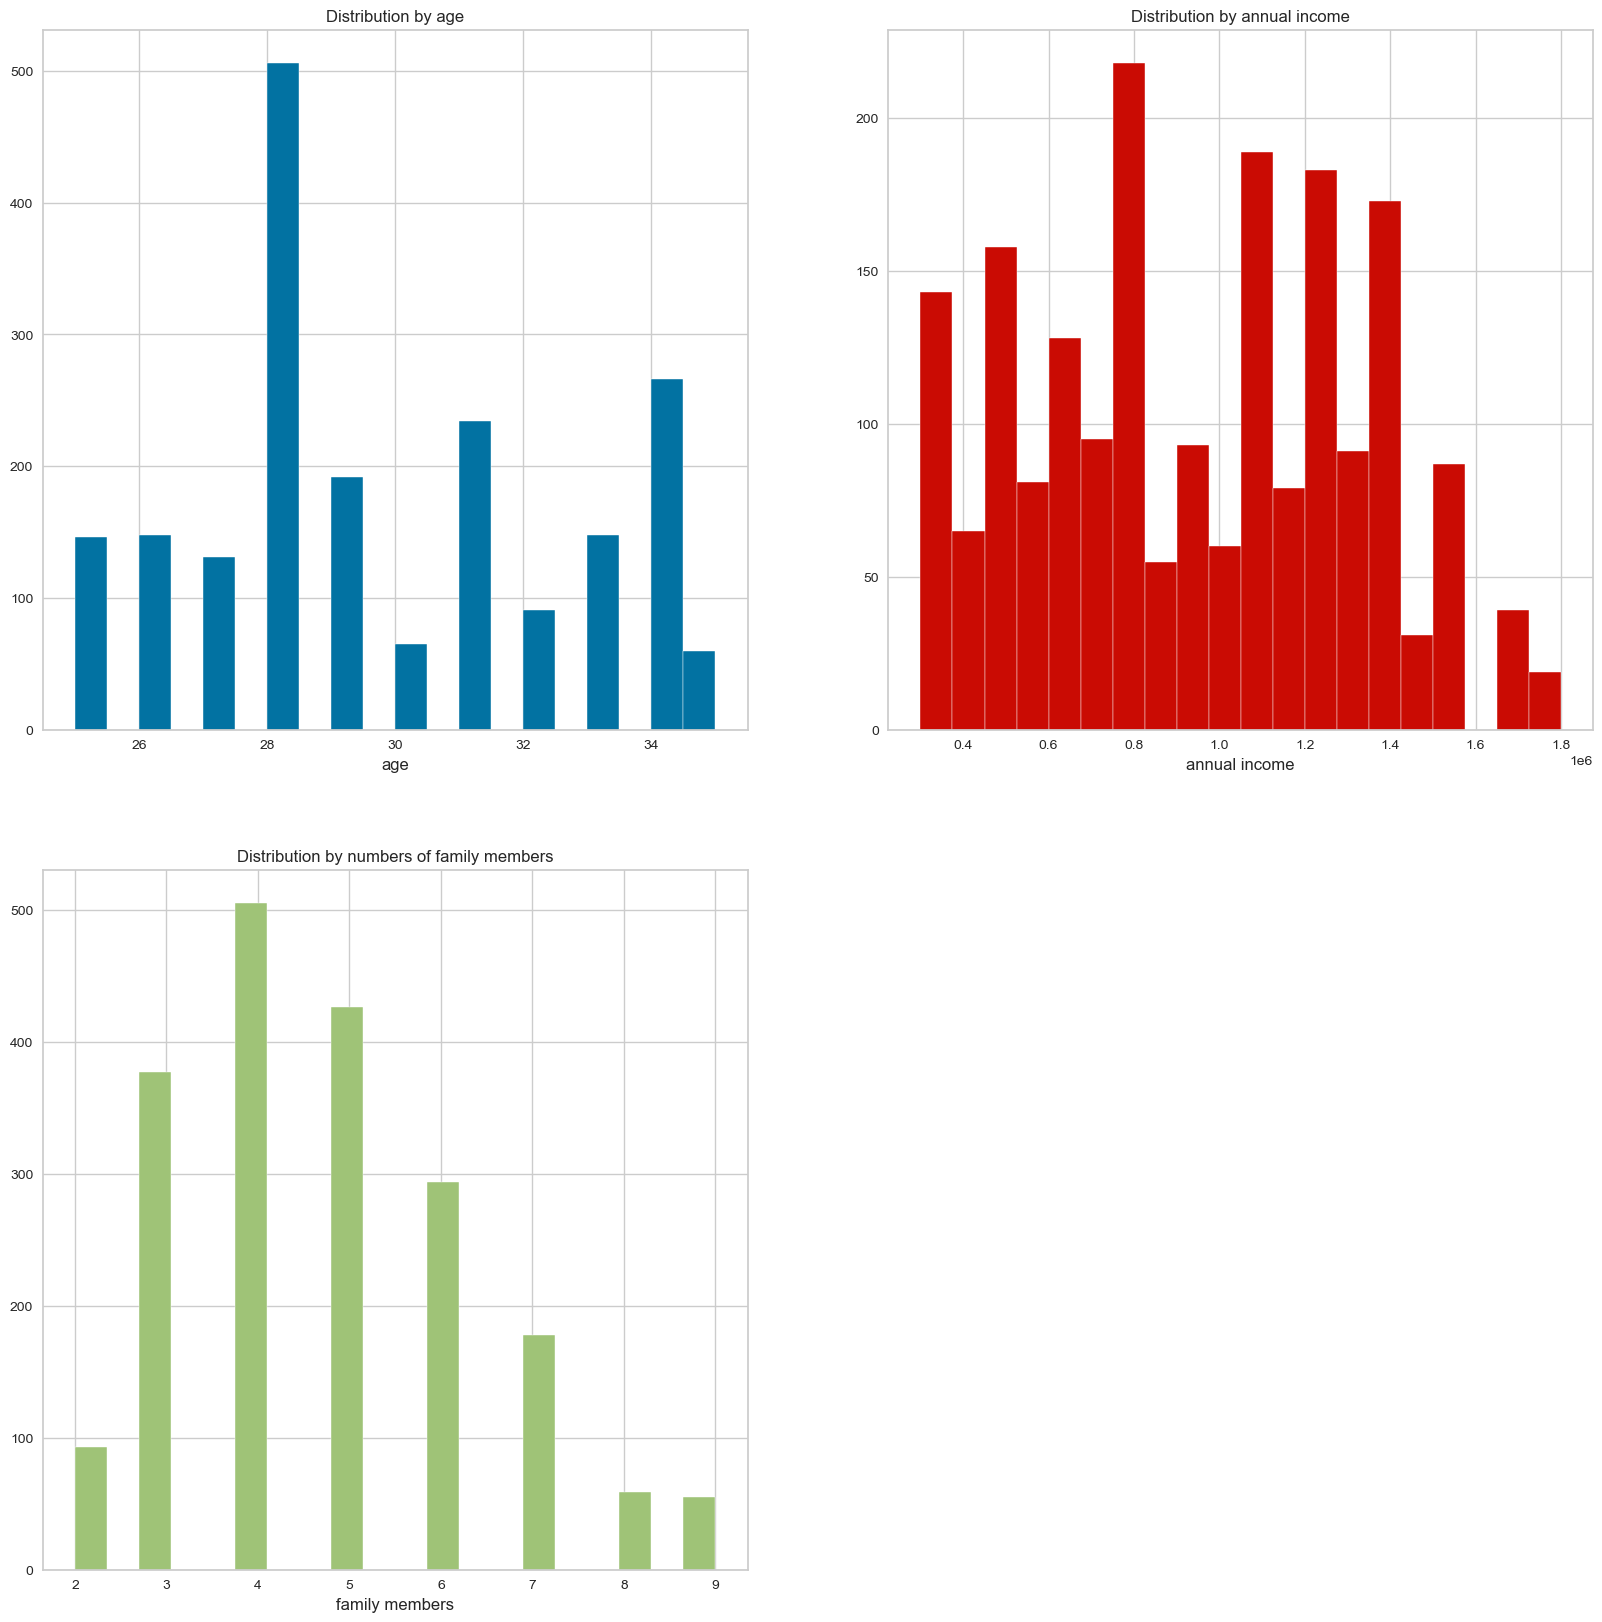

In [11]:
plt.figure(figsize=[20,20])
 
plt.subplot(221)
plt.hist(tinsurance['Age'],bins=20,color='b')
plt.xlabel('age')
plt.title('Distribution by age')
 
plt.subplot(222)
plt.hist(tinsurance['AnnualIncome'],bins=20,color='r')
plt.xlabel('annual income')
plt.title('Distribution by annual income')
 
plt.subplot(223)
plt.hist(tinsurance['FamilyMembers'],bins=20,color='g')
plt.xlabel('family members')
plt.title('Distribution by numbers of family members')



#### Categorical variables:

The distributions of values of categorical variables are presented in the bar plots bellow. I can be seen that in the dataset there are higher numbers of customers working in the private sector, customers who have higher education, customers who do not have chronic diseases, who are not frequent flyers, and who never travelled abroad. 

Text(0.5, 1.0, 'Distribution by frequent flyer')

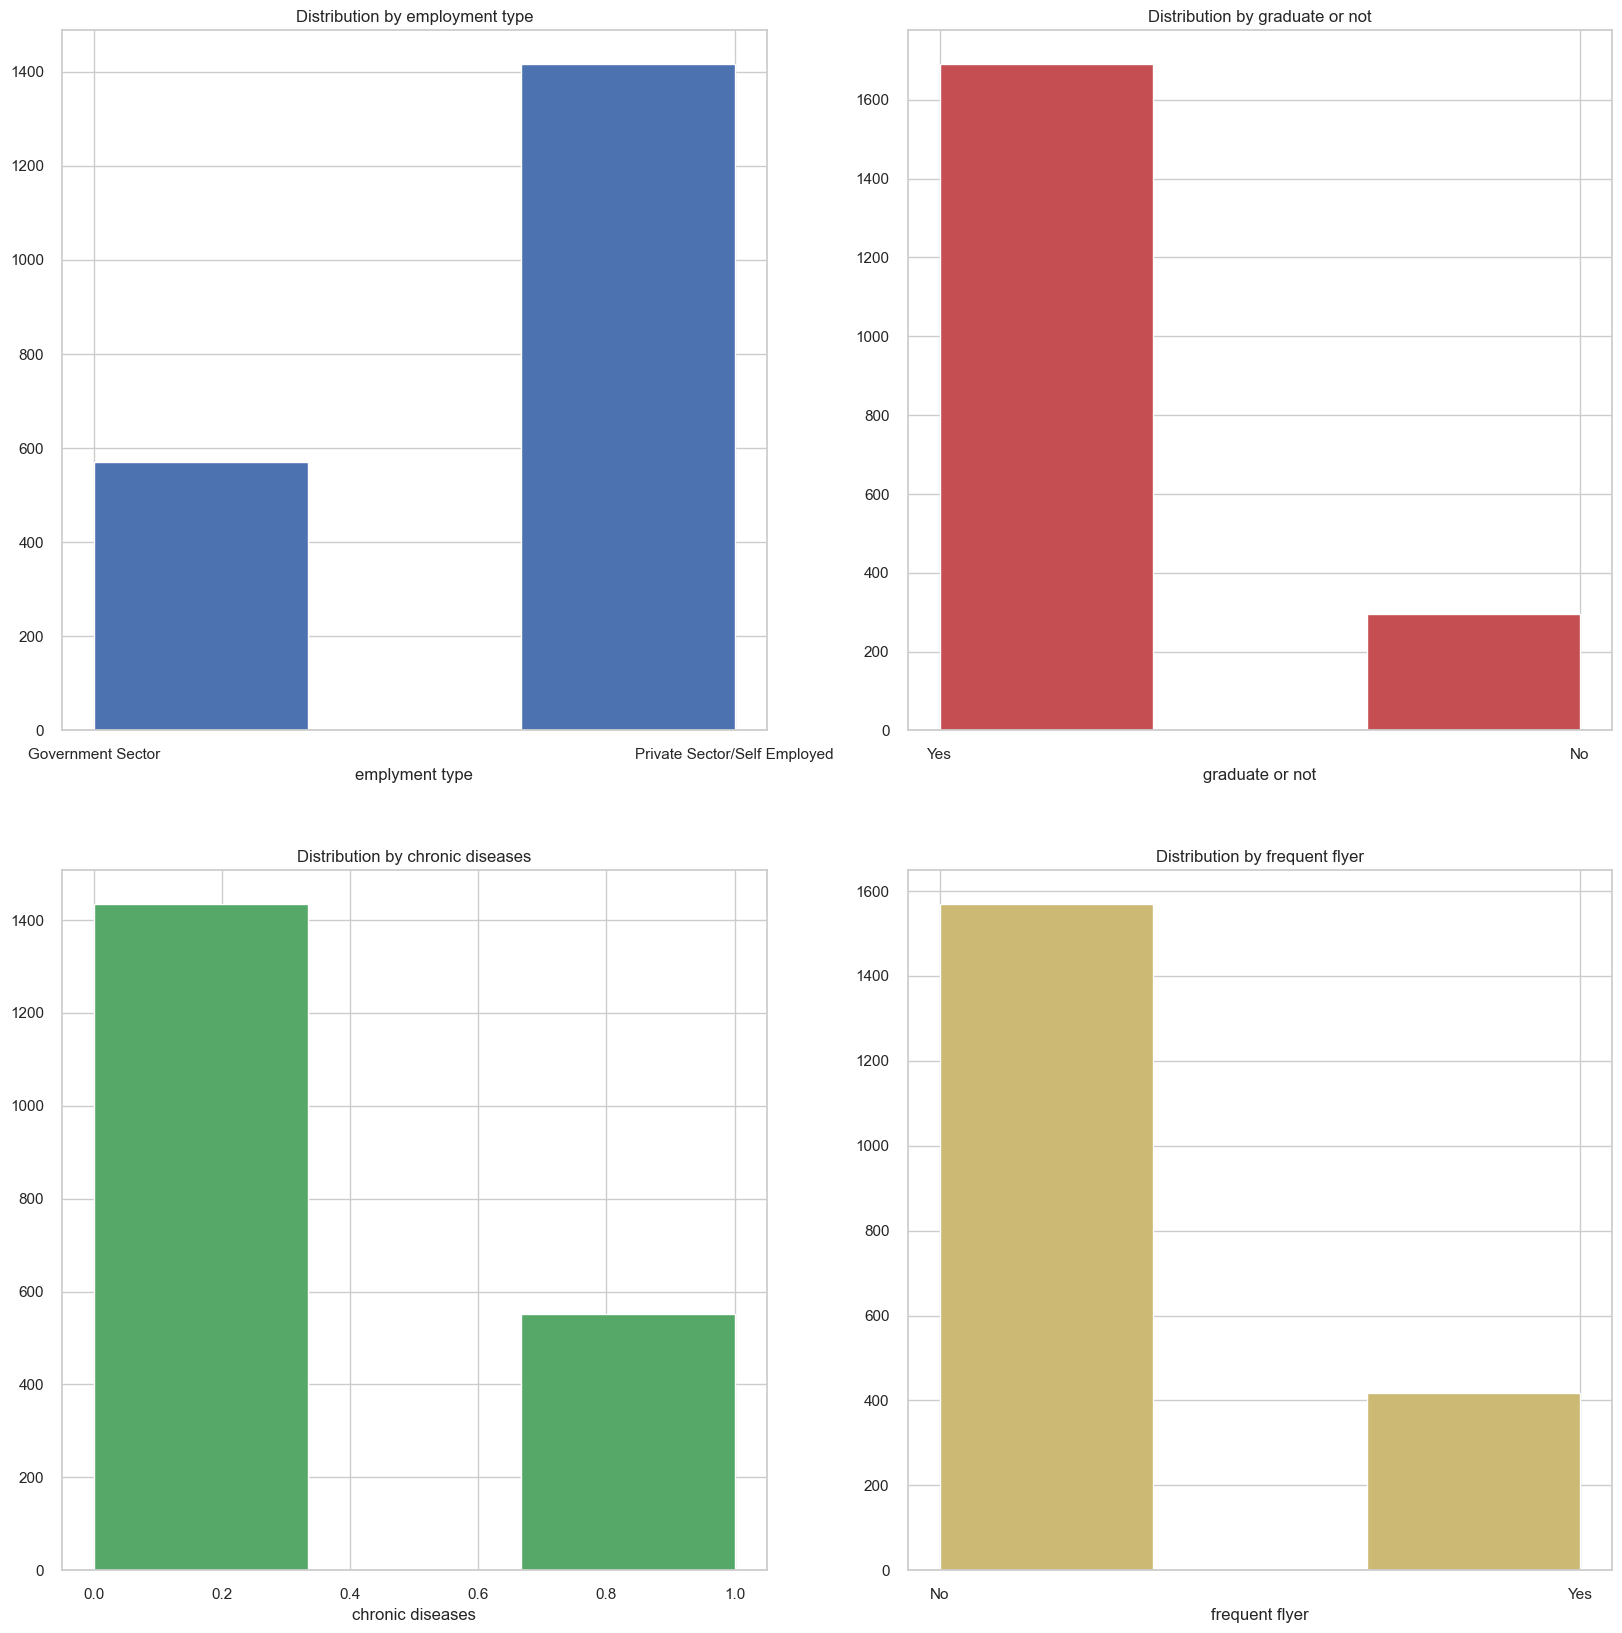

In [789]:
plt.figure(figsize=[20,20])
 
plt.subplot(221)
plt.hist(tinsurance['Employment Type'],bins=3,color='b')
plt.xlabel('emplyment type')
plt.title('Distribution by employment type')
 
plt.subplot(222)
plt.hist(tinsurance['GraduateOrNot'],bins=3,color='r')
plt.xlabel('graduate or not')
plt.title('Distribution by graduate or not')
 
plt.subplot(223)
plt.hist(tinsurance['ChronicDiseases'],bins=3,color='g')
plt.xlabel('chronic diseases')
plt.title('Distribution by chronic diseases')

plt.subplot(224)
plt.hist(tinsurance['FrequentFlyer'],bins=3,color='y')
plt.xlabel('frequent flyer')
plt.title('Distribution by frequent flyer')

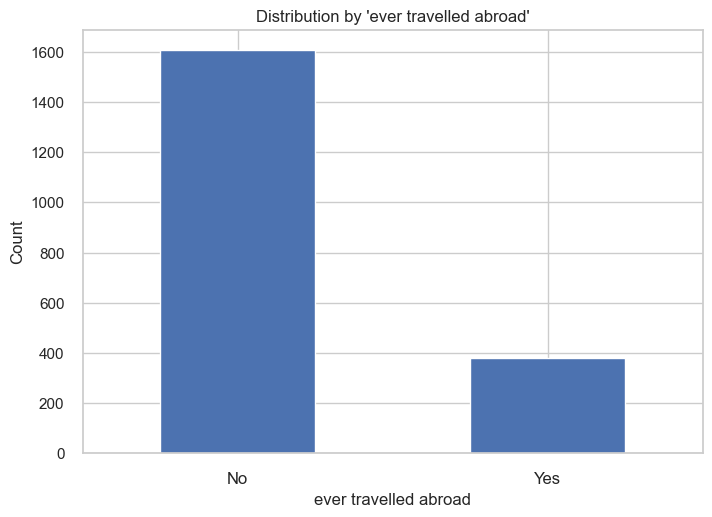

In [790]:
tinsurance["EverTravelledAbroad"].value_counts().plot(kind="bar")
plt.title("Distribution by 'ever travelled abroad'", fontsize = 12)
plt.xlabel("ever travelled abroad", fontsize = 12)
plt.xticks(rotation=0, fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Travel insurance:

It can be seen from the plot of the target variable, higher number of customers did not buy the travel insurance package.

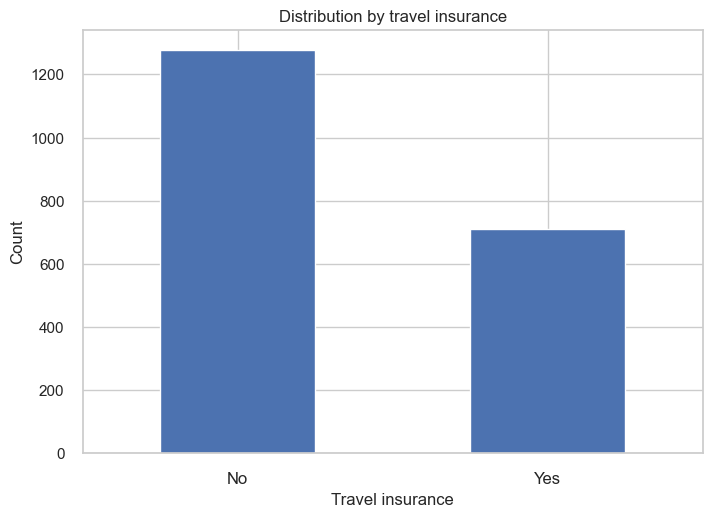

In [791]:
tinsurance["TravelInsurance"].value_counts().plot(kind="bar")
plt.title("Distribution by travel insurance", fontsize = 12)
plt.xlabel("Travel insurance", fontsize = 12)
plt.xticks(rotation=0)
plt.ylabel("Count", fontsize = 12)
plt.xticks((0, 1), ('No', 'Yes'), fontsize = 12)
plt.show()

## 2. Examining relationships between variables: correlations and statistical inference

Next, relationships between various variables will be examined. It will be checked if the differences between customers who bought and customers who did not buy the travel insurance package are statistically significant. Also, correlations between numerical variables will be measured. 

#### Categorical variables:

In order to examine if there are statistically significant differences between customers with regard to categorical variables, Pearson chi square tests of association were performed by using the function presented bellow. The distributions of percentages are plotted in the stacked bars.

In [792]:
def chi_square_test(data, confidence, variable):
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 1 - confidence
    print('')
    print(f'Pearson chi square test:{stat.round(3)}')
    print('')
    print(f'P_value: {p.round(3)}')
    if p <= alpha:
        print(f'With regard to the variable {variable}, \ngroups of customers \
who bought the travel insurance package \
and who didnt \nare dependent (reject H0).')
    else:
        print(f'With regard to the variable {variable}, \ngroups of customers \
who bought the travel insurance package \
and who didnt \nare independent (H0 holds true).')

In [793]:
tinsurance_chi_square = tinsurance.drop(columns = ['Age', 'AnnualIncome'])


In [794]:
frames = {}
for i in range(0, (len(tinsurance_chi_square.columns)-1)):
    table = pd.crosstab(tinsurance_chi_square.loc[:,"TravelInsurance"],tinsurance_chi_square.iloc[:,i], dropna=False)
    table = (table/table.sum()*100).round(2)
    frames[i]=pd.DataFrame(table).transpose()
    frames[i].columns = ['No','Yes']


In [795]:
for i in range(0,len(frames)):
    print(frames[i])

                                 No    Yes
Employment Type                           
Government Sector             75.44  24.56
Private Sector/Self Employed  59.77  40.23
                  No    Yes
GraduateOrNot              
No             66.44  33.56
Yes            63.89  36.11
                  No    Yes
FamilyMembers              
2              70.97  29.03
3              64.19  35.81
4              68.32  31.68
5              69.25  30.75
6              56.12  43.88
7              54.49  45.51
8              64.41  35.59
9              52.73  47.27
                    No    Yes
ChronicDiseases              
0                64.81  35.19
1                62.86  37.14
                  No    Yes
FrequentFlyer              
No             70.00  30.00
Yes            42.69  57.31
                        No    Yes
EverTravelledAbroad              
No                   74.36  25.64
Yes                  21.58  78.42


In [796]:
def stacked_bars(file, title_label, title):
    ax = file.plot(kind="barh", stacked=True, rot=0)
    ax.legend(title=title_label, bbox_to_anchor=(1, 1.02),
             loc='upper left')
    plt.xlabel("")
    plt.xticks(rotation = "vertical")
    plt.xlabel("%")
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.title(title)
    plt.show()

Text(0.5, 0, '%')

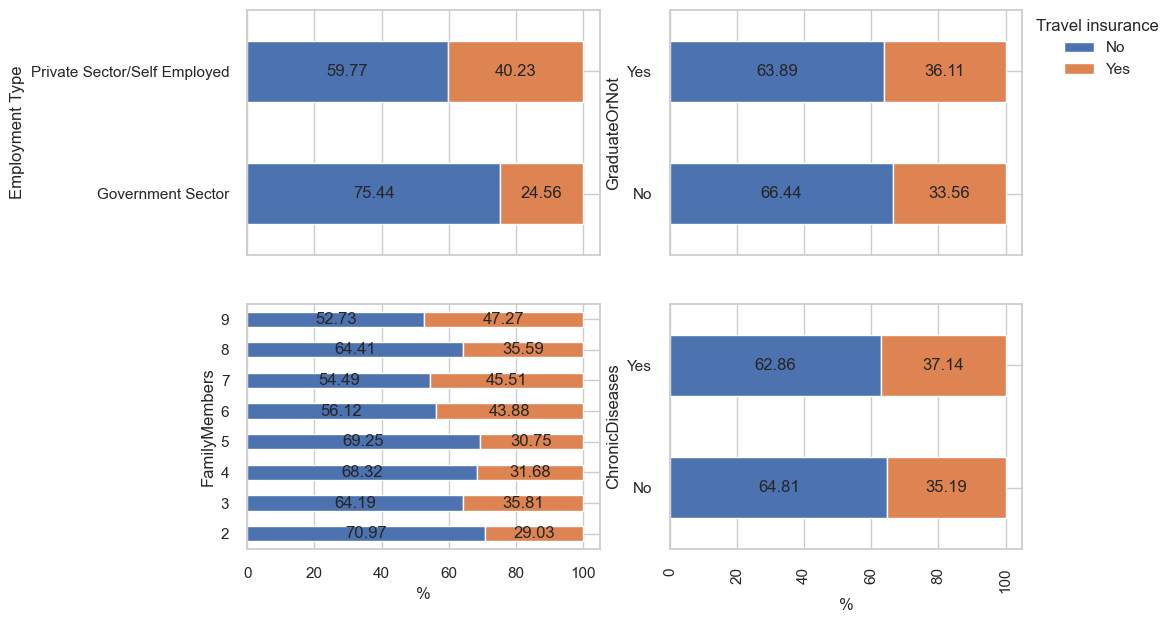

In [797]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,sharex = True)

plt.xticks(rotation = "vertical")

frames[0].plot(ax=ax1,kind = "barh", stacked = True,figsize = (10,7),legend = False)
frames[1].plot(ax=ax2,kind = "barh", stacked = True,figsize = (10,7),legend = False)
frames[2].plot(ax=ax3,kind = "barh", stacked = True,figsize = (10,7), legend = False)
frames[3].plot(ax=ax4,kind = "barh", stacked = True,figsize = (10,7), legend = False)
ax2.legend(title='Travel insurance', bbox_to_anchor=(1, 1.02),
                     loc='upper left')      
for c in ax1.containers:
        ax1.bar_label(c, label_type='center')
for c in ax2.containers:
        ax2.bar_label(c, label_type='center')
for c in ax3.containers:
        ax3.bar_label(c, label_type='center')
for c in ax4.containers:
        ax4.bar_label(c, label_type='center')
ax4.set_yticks([0,1],["No","Yes"])
ax1.set_xlabel("%")
ax2.set_xlabel("%")
ax3.set_xlabel("%")
ax4.set_xlabel("%")

Text(0.5, 0, '%')

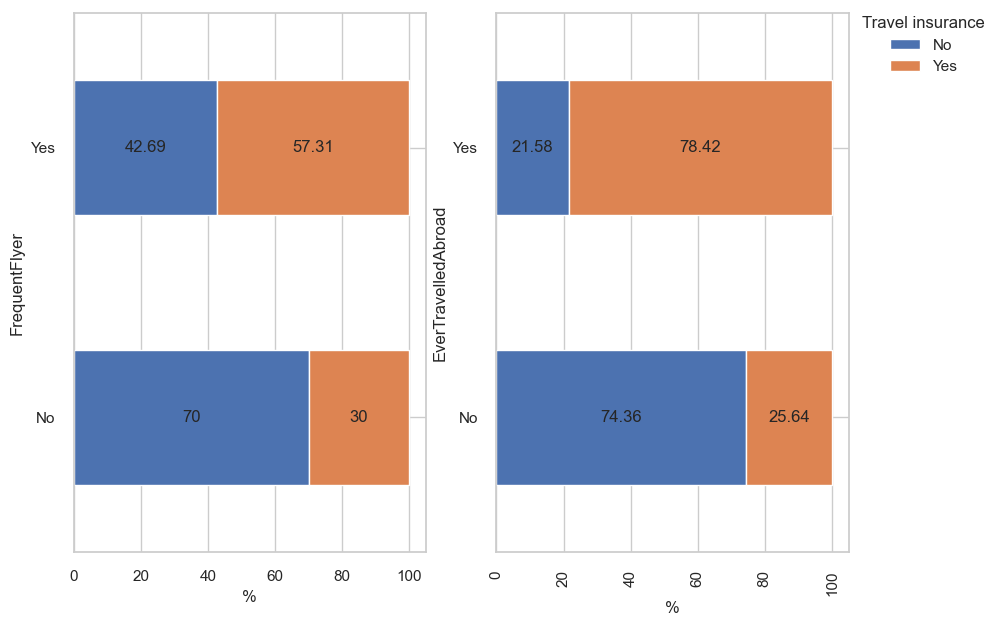

In [798]:
fig,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,sharex = True)

plt.xticks(rotation = "vertical")

frames[4].plot(ax=ax1,kind = "barh", stacked = True,figsize = (10,7), legend = False)
frames[5].plot(ax=ax2,kind = "barh", stacked = True,figsize = (10,7),legend = False)

ax2.legend(title='Travel insurance', bbox_to_anchor=(1, 1.02),
                     loc='upper left')      
for c in ax1.containers:
        ax1.bar_label(c, label_type='center')
for c in ax2.containers:
        ax2.bar_label(c, label_type='center')
ax1.set_xlabel("%")
ax2.set_xlabel("%")

It can be observed that:
- higher proportion of customers working in the private sector bought the travel insurance package than those working in the government sector (the difference is statistically significant).
- Graduation does not have a statistically significant effect on the buying decision.
- Customers having higher numbers of familly members tend to buy the travel insurance package more often (the difference is statistically significant).
- Having chronic diseases does not have a statistically significant effect on the buying decision.
- Customers who are frequent flyers buy the travel insurance package more often than those who are not (the difference is statistically significant).
- Customers who never travelled abroad more often are those who did not buy the travel insurance package (the difference is statistically significant).

In [799]:
inp = float(input("What is a confidence level (0,99, 0,95, or 0.9)?"))
for i in range(0,len(frames)):
    chi_square_test(frames[i], inp, tinsurance_chi_square.columns[i])

What is a confidence level (0,99, 0,95, or 0.9)?0.95

Pearson chi square test:4.913

P_value: 0.027
With regard to the variable Employment Type, 
groups of customers who bought the travel insurance package and who didnt 
are dependent (reject H0).

Pearson chi square test:0.053

P_value: 0.818
With regard to the variable GraduateOrNot, 
groups of customers who bought the travel insurance package and who didnt 
are independent (H0 holds true).

Pearson chi square test:15.283

P_value: 0.033
With regard to the variable FamilyMembers, 
groups of customers who bought the travel insurance package and who didnt 
are dependent (reject H0).

Pearson chi square test:0.02

P_value: 0.889
With regard to the variable ChronicDiseases, 
groups of customers who bought the travel insurance package and who didnt 
are independent (H0 holds true).

Pearson chi square test:14.071

P_value: 0.0
With regard to the variable FrequentFlyer, 
groups of customers who bought the travel insurance package and who d

#### Numerical variables:

To check if there are statistically significant groups between customers who bought the travel insurance package and those who didn't with regard to numerical variables (family members variable was treated as a numerical variable in this case), t-tests of statistical signifficance as well as confidence intervals of differences between groups of customers were calculated.

In [13]:
tinsurance_t_test = tinsurance.drop(columns = ['Employment Type', 'GraduateOrNot',
                                               'ChronicDiseases',"FrequentFlyer", 
                                               "EverTravelledAbroad"])
tinsurance_t_test.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,31,400000,6,0
1,31,1250000,7,0
2,34,500000,4,1
3,28,700000,3,0
4,28,700000,8,0


##### Statistical significance test (t-test):

Based on the user inputs of confidence levels (0.9, 0.95 or 0.99), it was found that for all signifficance levels:
- age variable has a statistically signifficant impact of the buying decision - older customers are more frequent buyers of the travel insurance package.
- Annual income variable has a statistically significant impact - richer customers are more frequent buyers of the travel insurance package.
- Family members variable has a statistically significant impact - customers having higher numbers of family members are more frequent buyers of the travel insurance package.

In [801]:
inp2 = float(input("What is the confidence level?:"))
significant = []
unsignificant = []
for inp1 in tinsurance_t_test.iloc[:,:3].columns.values:
    summary, results = rp.ttest(group1= tinsurance_t_test[inp1][tinsurance_t_test['TravelInsurance'] == 0], group1_name= "No",
         group2= tinsurance_t_test[inp1][tinsurance_t_test['TravelInsurance'] == 1], group2_name= "Yes")
    print(summary)
    print(results)
    print("")
    if results.iloc[3,1] < (1 - inp2):
        print(f'There is the statistically significant difference \n\
between means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        significant.append(inp1)
    else:
        print(f'There is no statistically significant difference \n\
between means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        unsignificant.append(inp1)
print('')
print(f'Significant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{unsignificant})')

What is the confidence level?:0.95
   Variable       N       Mean        SD        SE  95% Conf.   Interval
0        No  1277.0  29.517619  2.644396  0.074000  29.372445  29.662794
1       Yes   710.0  29.888732  3.331732  0.125038  29.643244  30.134221
2  combined  1987.0  29.650226  2.913308  0.065356  29.522052  29.778401
          Independent t-test    results
0   Difference (No - Yes) =     -0.3711
1      Degrees of freedom =   1985.0000
2                       t =     -2.7255
3   Two side test p value =      0.0065
4  Difference < 0 p value =      0.0032
5  Difference > 0 p value =      0.9968
6               Cohen's d =     -0.1276
7               Hedge's g =     -0.1275
8          Glass's delta1 =     -0.1403
9        Point-Biserial r =     -0.0611

There is the statistically significant difference 
between means of Age in groups of Yes and No.
   Variable       N          Mean             SD            SE     95% Conf.  \
0        No  1277.0  8.212999e+05  328898.896970   9203

##### Confidence intervals for mean differences between groups:

The same result as in the calculation of t-tests was observed when confidence intervals for mean differences between groups of customers who bought the travel insurance package and who didn't were calculated. it was found that differences between groups of customers with regards of all three numerical variables are statistically significant.

In [802]:
inp2 = float(input("What is the confidence level?:"))
significant = []
unsignificant = []
for inp1 in tinsurance_t_test.iloc[:,:3].columns.values:
    summary, results = rp.ttest(group1= tinsurance_t_test[inp1][tinsurance_t_test['TravelInsurance'] == 0], group1_name= "No",
             group2= tinsurance_t_test[inp1][tinsurance_t_test['TravelInsurance']== 1], group2_name= "Yes")
    lower = ((summary.iloc[0,2] - summary.iloc[1,2])
    - stats.t.ppf((1+inp2)/2., summary.iloc[2,1]-1)
    * (math.sqrt((summary.iloc[0,4])**2/summary.iloc[0,1] + (summary.iloc[1,4])**2/summary.iloc[1,1])))

    upper = ((summary.iloc[0,2] - summary.iloc[1,2])
    + stats.t.ppf((1+inp2)/2., summary.iloc[2,1]-1)
    * (math.sqrt((summary.iloc[0,4])**2/summary.iloc[0,1] + (summary.iloc[1,4])**2/summary.iloc[1,1])))

    print(f'There is a {inp2*100} chance that the confidence interval of {lower.round(3), upper.round(3)} \
contains the true difference \nbetween means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
    print('')
    if (lower < 0 and upper < 0) or (lower > 0 and upper > 0):
        print(f'Since this interval does not contain the value “0” it means \n\
that it’s highly likely that there is a true difference between \n\
means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        print('')
        significant.append(inp1)
    else:
        print(f'Since this interval contains the value “0” it means that it’s unlikely \n\
that there is a true difference between \n\
means of {inp1} in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]}.')
        print('')
        unsignificant.append(inp1)
print('')
print(f'Significant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{significant})')
print('')
print(f'Unsignificant statistical differences in groups of {summary.iloc[1,0]} and {summary.iloc[0,0]} \n\
are between means for these variables:\n\
{unsignificant})')


What is the confidence level?:0.95
There is a 95.0 chance that the confidence interval of (-0.381, -0.361) contains the true difference 
between means of Age in groups of Yes and No.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of Age in groups of Yes and No.

There is a 95.0 chance that the confidence interval of (-313091.546, -310787.484) contains the true difference 
between means of AnnualIncome in groups of Yes and No.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of AnnualIncome in groups of Yes and No.

There is a 95.0 chance that the confidence interval of (-0.274, -0.263) contains the true difference 
between means of FamilyMembers in groups of Yes and No.

Since this interval does not contain the value “0” it means 
that it’s highly likely that there is a true difference between 
means of FamilyMembers i

##### Correlations between numerical variables:

Next, it was examined if there are correlations between numerical variables. It was found that variables age, annual income and the number of family members are not correlated between each other.

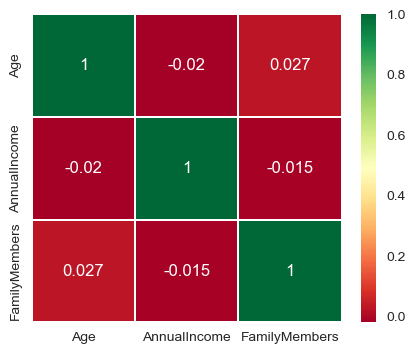

In [14]:
sns.heatmap(tinsurance_t_test.iloc[:,:-1].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(5,4)
plt.show()

## 3. Machine learning

In the third part of the analysis, machine learning models are built, trained and tested in order to find a model which best predicts decisions of customers to buy or not to buy the travel insurance package. 

### Splitting training and testing data

First, the data were split into feature variables and target variable as well as into training and testing datasets. 75 percent of data were included into the training dataset, 25 percent into the testing dataset.

In [804]:
X = tinsurance.drop(['TravelInsurance'],axis=1)
y = tinsurance['TravelInsurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Building machine learning pipelines

Next, pipelines of transforming data were built. For some categorical variables it was needed to encode them into numbers, those ordinal encoder function was applied. The variable 'family members' which was treated as a numerical variable. For numerical variables, standart scaler was applied to transform the variables into comparable scales.

In [850]:
numeric_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
      ('binary', OrdinalEncoder())
])


In [851]:
numeric_features = ['Age', 'AnnualIncome', 'FamilyMembers']
binary_features = ['Employment Type', 'GraduateOrNot',"FrequentFlyer", "EverTravelledAbroad", 'ChronicDiseases']


Preprocessor was created grouping pipelines transforming categorical and numerical variables. 

In [852]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('binary', binary_transformer, binary_features)
]) 

Various classifiers which will be used for modelling was combined into a list. The first list 'classifiers_full' included more classifiers. A second list included classifiers which will be used for hyperparameter tuning and feature selection.

In [853]:
classifiers_full = [
    
     NuSVC(gamma='auto')
    ,LinearSVC()
    ,SGDClassifier(max_iter=100, tol=1e-3)
    ,LogisticRegression()
    ,BaggingClassifier()
    ,ExtraTreesClassifier(n_estimators=300)
    ,RandomForestClassifier()
    ,SVC()
    ,KNeighborsClassifier()
    ,AdaBoostClassifier()
    ,GradientBoostingClassifier()
    ,xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
   ]

classifiers = [
     LogisticRegression()
    ,RandomForestClassifier()
    ,GradientBoostingClassifier()
    ,SVC()
    ,KNeighborsClassifier()
   ]

Functions for fitting the pipilines with different classifiers, for visualising them with classification reports and confusion matrixes as well as function for plotting bars which will be used for plotting accuracy scores of different classifiers were created.

In [ ]:
def score_model(x_train, y_train, x_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """    
    pipeline = Pipeline(steps = [
                   ('preprocessor', preprocessor),
                   ('classifier',classifier)
    ])
    model = pipeline.fit(x_train, y_train)
    prediction = model.predict(x_test)
    models.append(model)
    print (estimator.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(estimator.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores["model_name"].append(f'{classifier.__class__.__name__}')
    scores["a_score"].append(acc_sq)
    scores["f1_score"].append(f1)
    scores["predictions"].append(prediction)

In [855]:
def visualize_model(x_train, y_train, x_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['No', 'Yes'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()


In [812]:
def visualize_model_confusion(x_train, y_train, x_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    # Instantiate the classification model and visualizer
    confusion_matrix(
        model, x_train, y_train, x_test, y_test, classes=['No', 'Yes'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    plt.tight_layout()


In [813]:
def plot_bars(data,y,y_label,title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=data.index, y=y,
            data=data, 
            errorbar="sd", color = sns.color_palette()[1]).set(title=title)
    plt.xticks(rotation=90)
    ax.bar_label(ax.containers[0])
    ax.set_ylabel(y_label)
    ax.set_xlabel("")
    plt.show()

The function of running pipelines was run for each classfier in the longer list. Accuracy scores are presented in the output.

In [880]:
models = []
scores = {}
scores["model_name"] = []
scores["a_score"] = []
scores["f1_score"] = []
scores["predictions"] = []
for classifier in classifiers_full:
    score_model(X_train, y_train, X_test, y_test, classifier)

NuSVC
NuSVC F1_score: 0.702
Model accuracy score: 0.829

LinearSVC
LinearSVC F1_score: 0.633
Model accuracy score: 0.779

SGDClassifier
SGDClassifier F1_score: 0.575
Model accuracy score: 0.732

LogisticRegression
LogisticRegression F1_score: 0.615
Model accuracy score: 0.771

BaggingClassifier
BaggingClassifier F1_score: 0.642
Model accuracy score: 0.769

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.635
Model accuracy score: 0.771

RandomForestClassifier
RandomForestClassifier F1_score: 0.665
Model accuracy score: 0.789

SVC
SVC F1_score: 0.707
Model accuracy score: 0.833

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.662
Model accuracy score: 0.797

AdaBoostClassifier
AdaBoostClassifier F1_score: 0.672
Model accuracy score: 0.821

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.731
Model accuracy score: 0.849

XGBClassifier
XGBClassifier F1_score: 0.66
Model accuracy score: 0.791



In [857]:
for model in models:
    joblib.dump(model, f'model{models.index(model)}.pkl')

In [901]:
scores = pd.DataFrame(scores).set_index("model_name")
scores.to_csv('scores_soccer.csv')

In [902]:
scores = pd.DataFrame(scores).sort_values("a_score", ascending = False)

Accuracy scores are high for all models are relatively high (in the range from 0.76 to 0.849) It can be seen from the plot bellow that the GradientBoosting, SVC, NuSVC, and AdaBoost classifiers give higherst accuracy scores. 

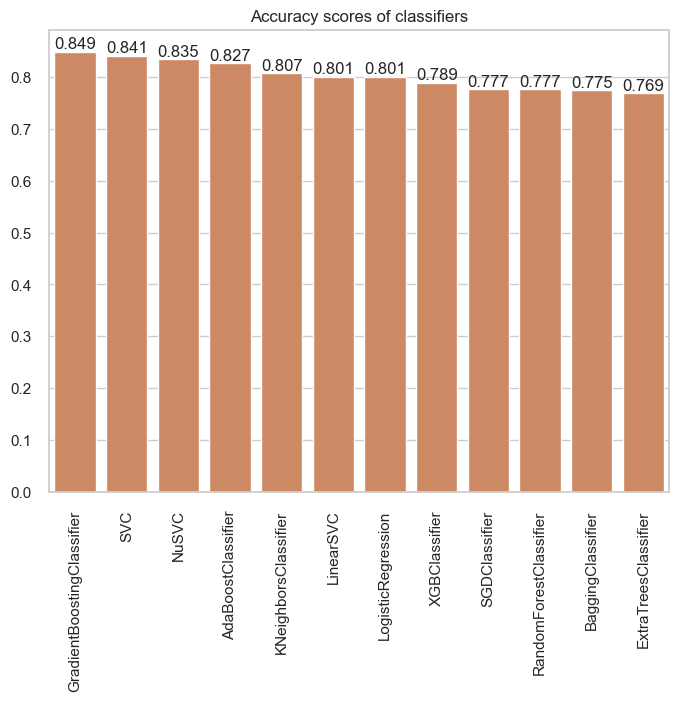

In [818]:
plot_bars(scores, "a_score", "", "Accuracy scores of classifiers")

The metrics of the classifiers was vizualised with classification reports, confusion matrixes plots, roc-auc curves and precission-recall curves (see bellow). From confusion matrixes plots it can be observed that all the classifiers predicts decision not to buy the travel insurance package the best. 

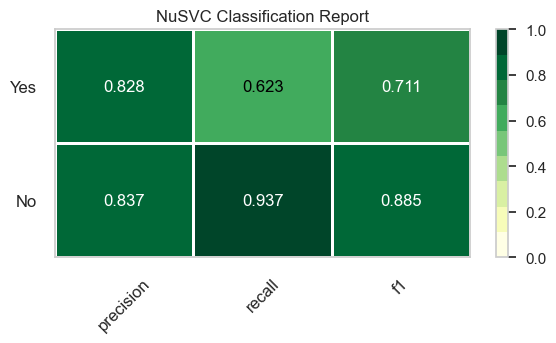

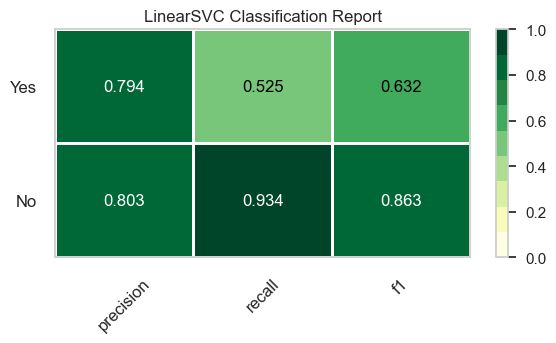

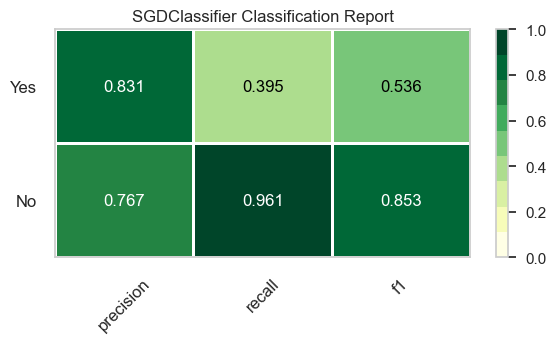

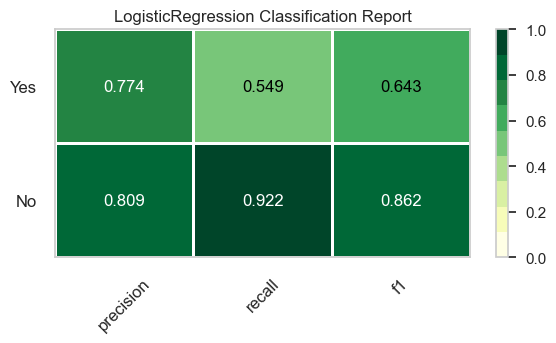

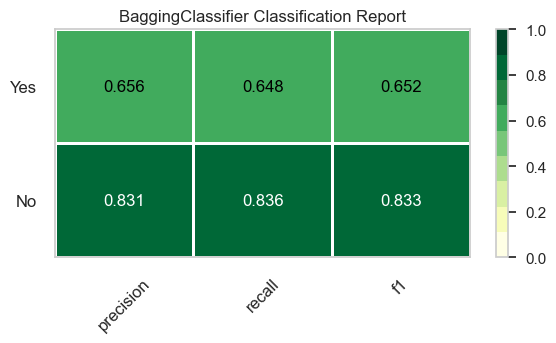

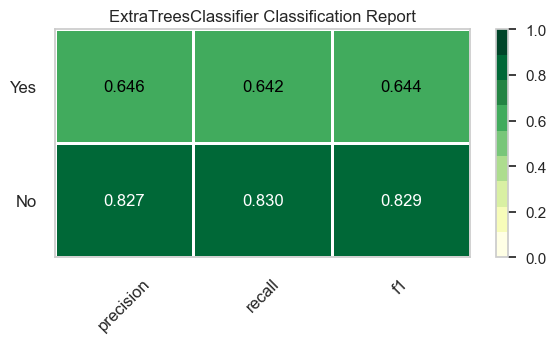

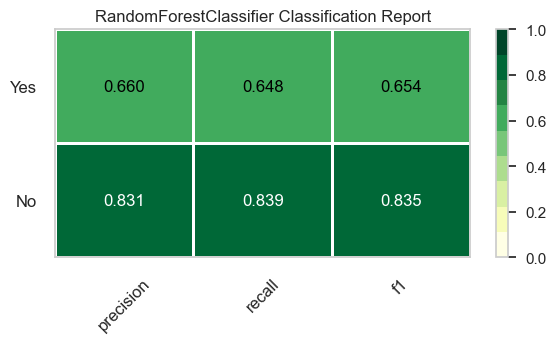

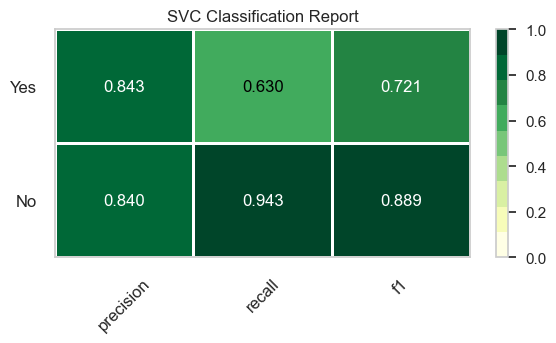

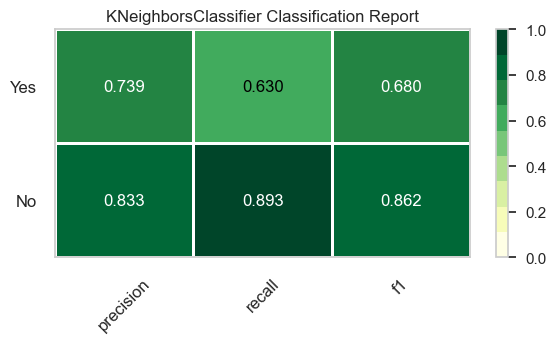

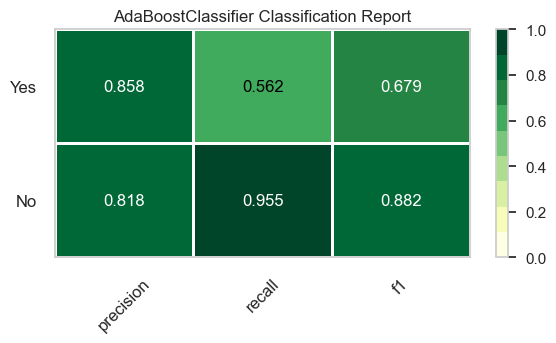

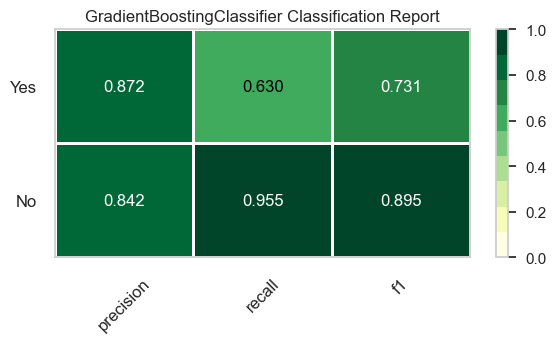

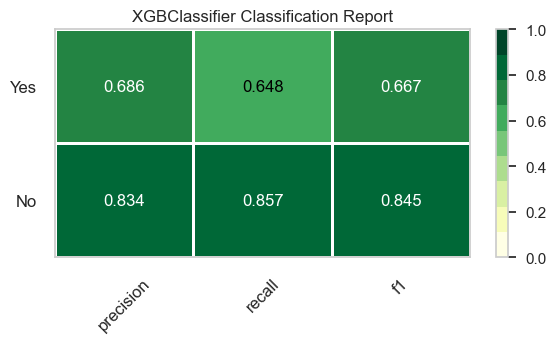

In [819]:
for model in models:
    visualize_model(X_train, y_train, X_test, y_test, model)
    

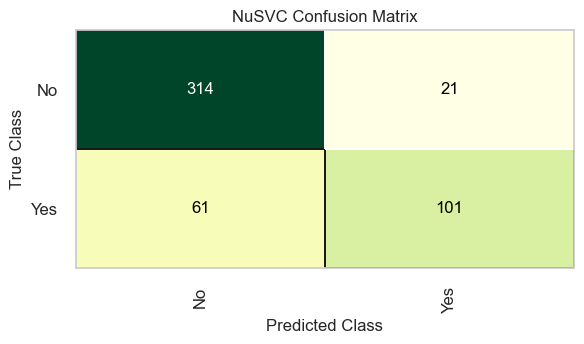

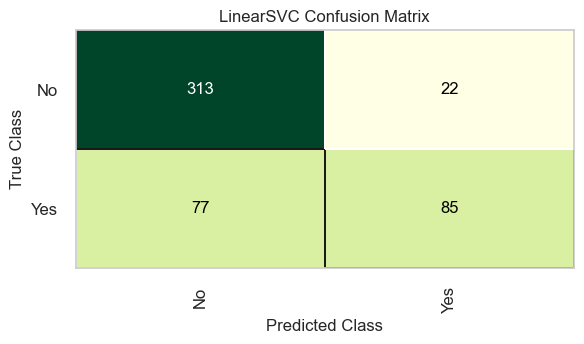

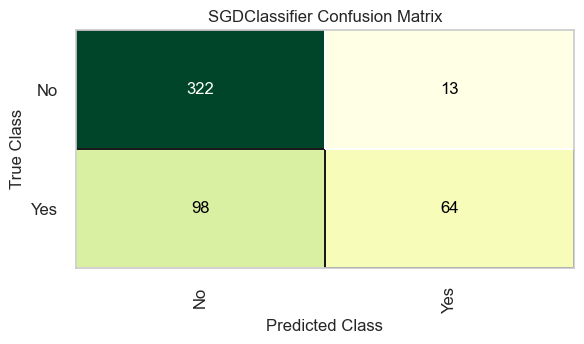

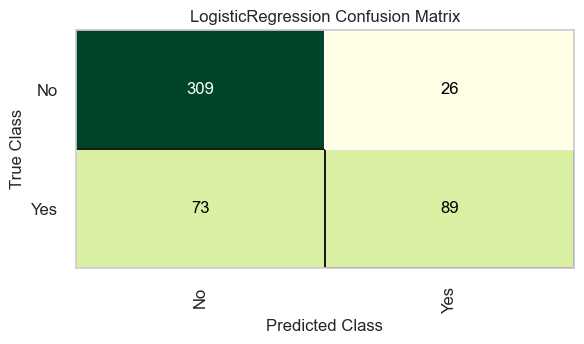

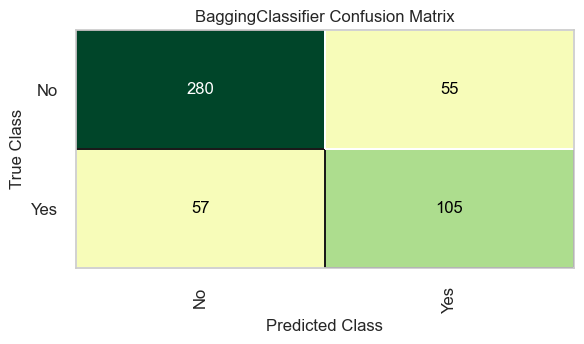

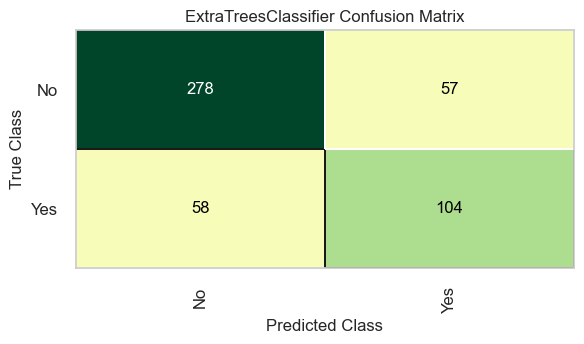

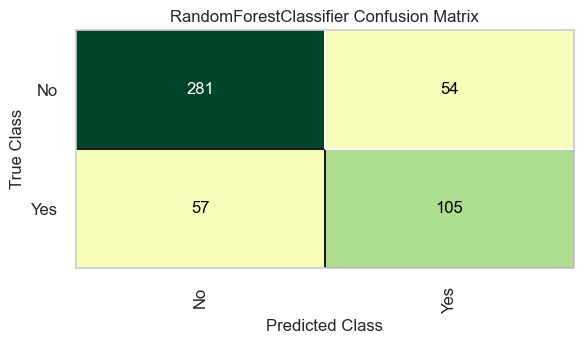

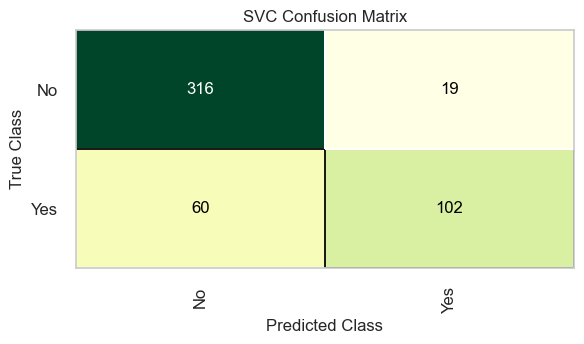

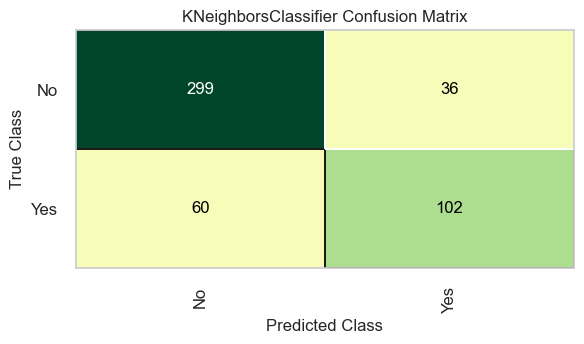

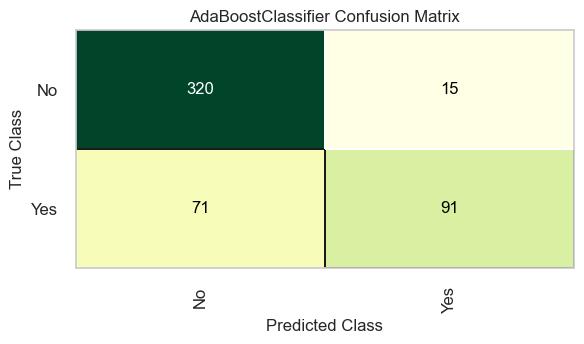

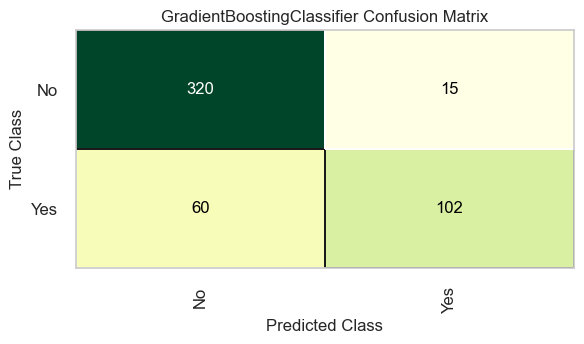

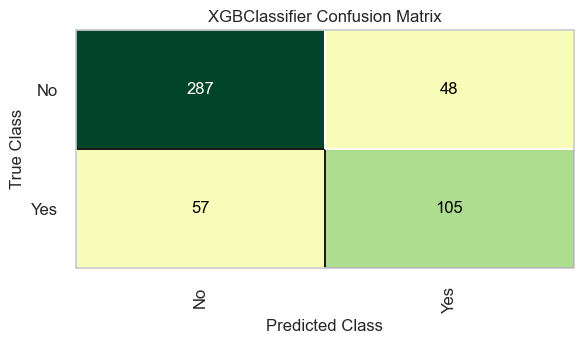

<Figure size 800x550 with 0 Axes>

In [820]:
for model in models:
    visualize_model_confusion(X_train, y_train, X_test, y_test, model)

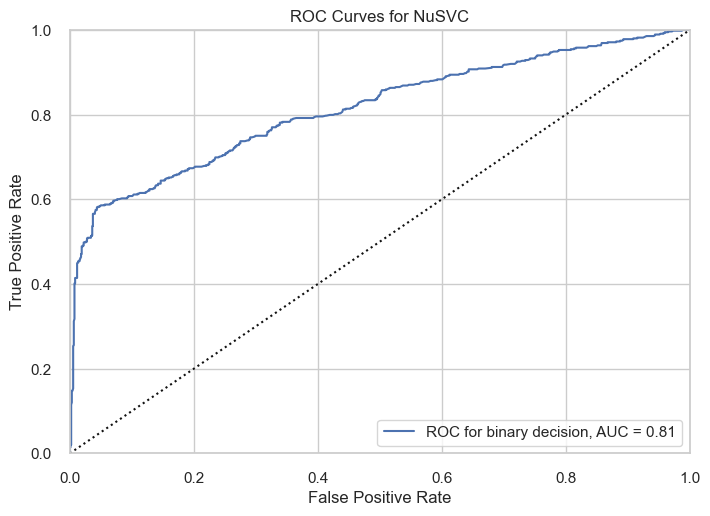

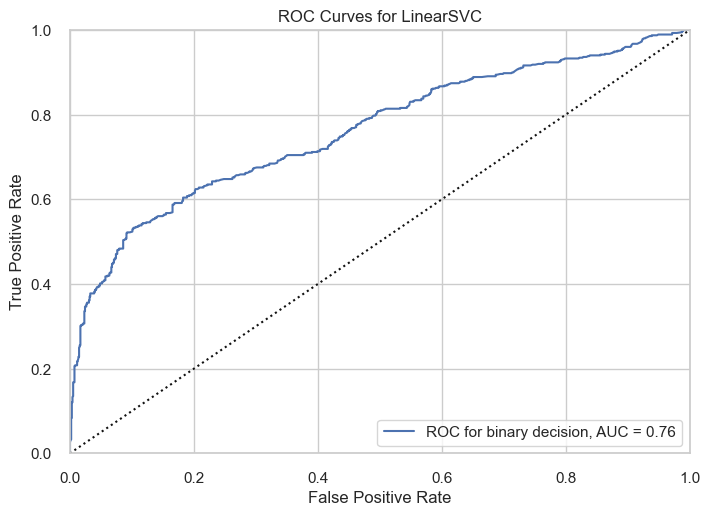

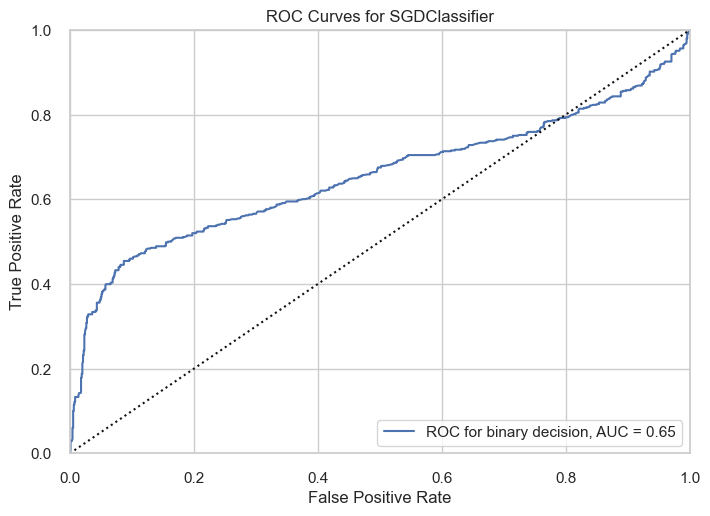

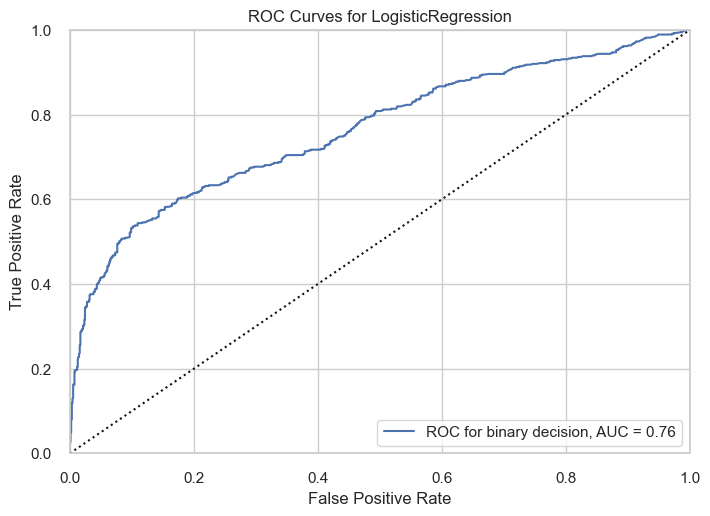

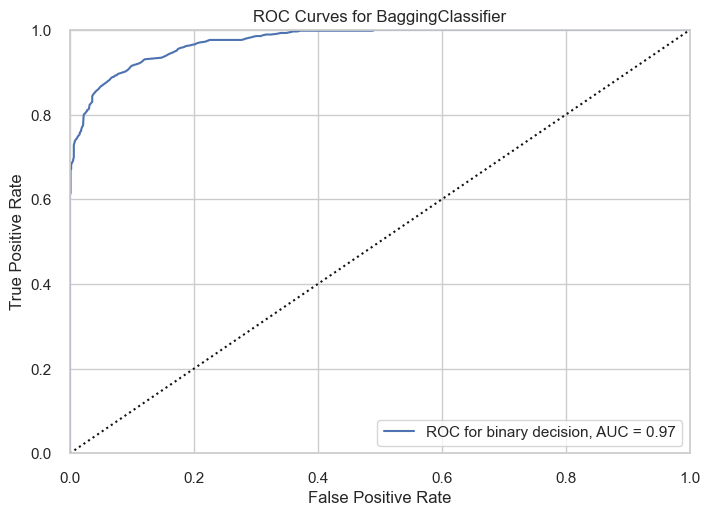

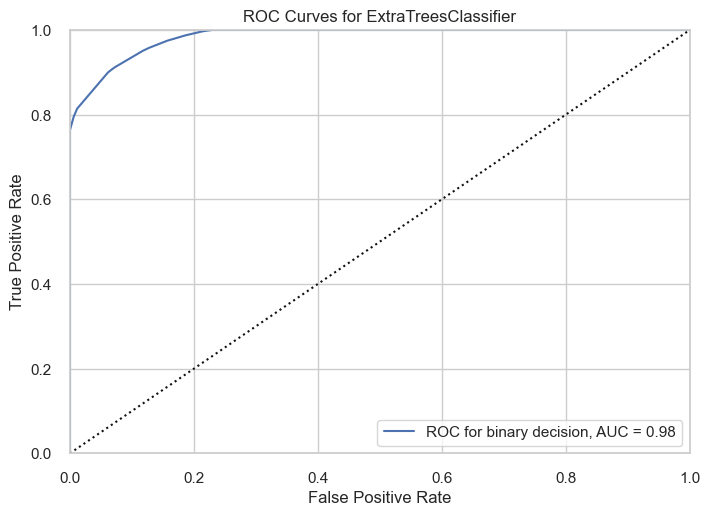

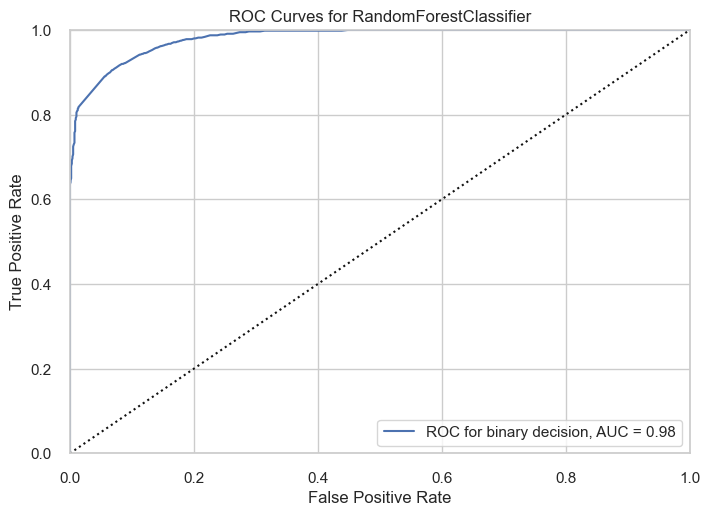

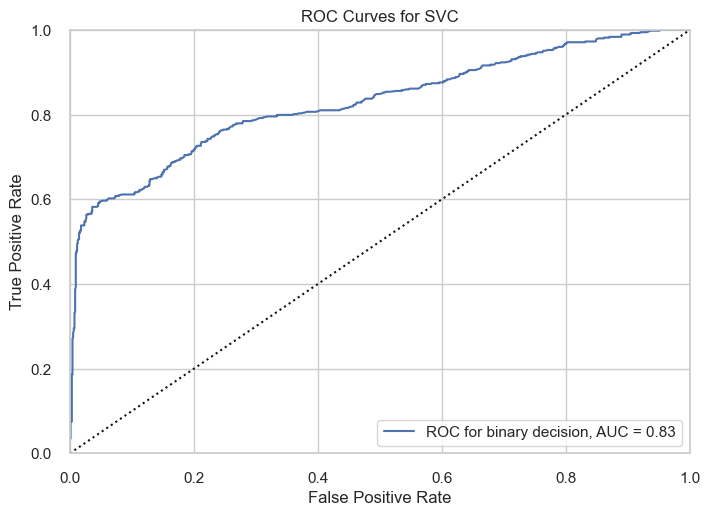

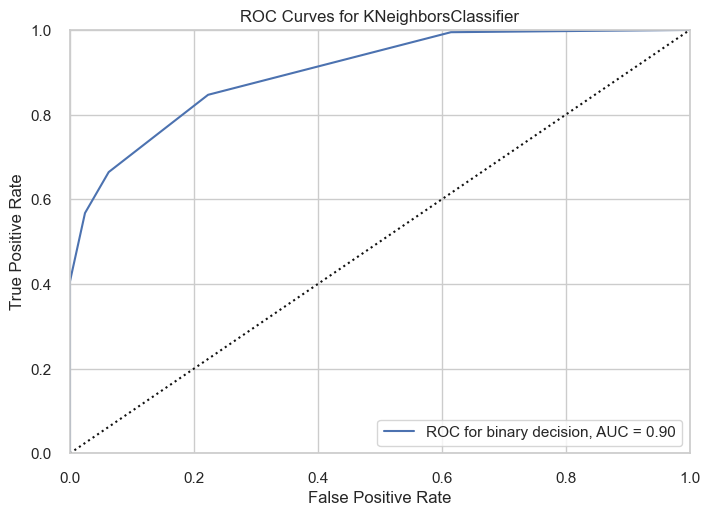

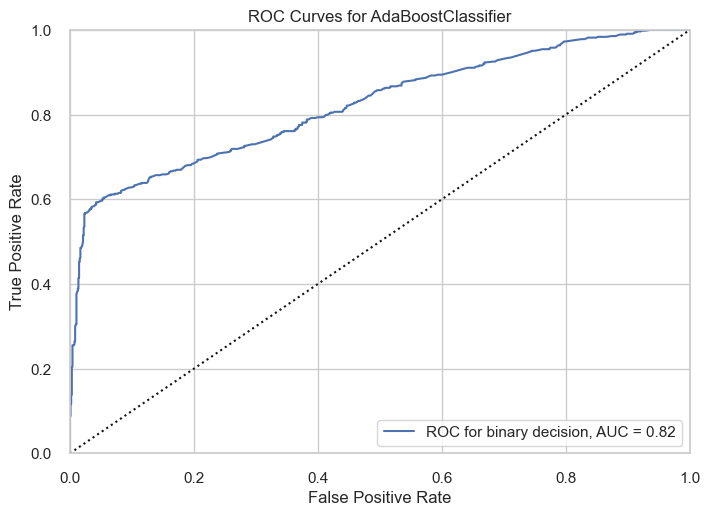

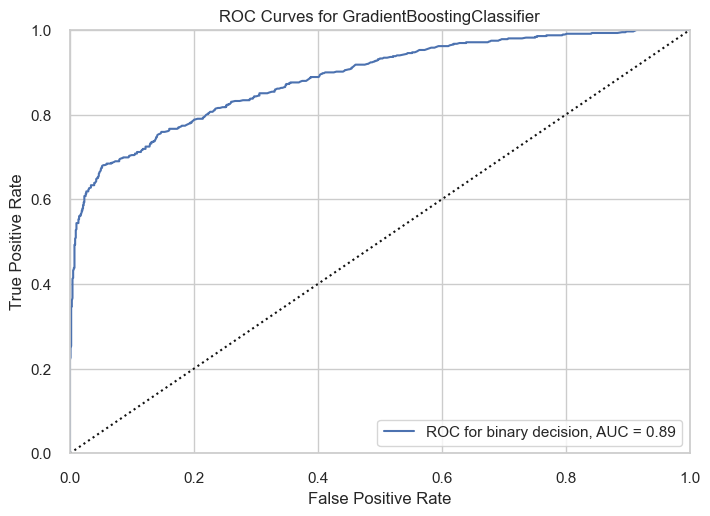

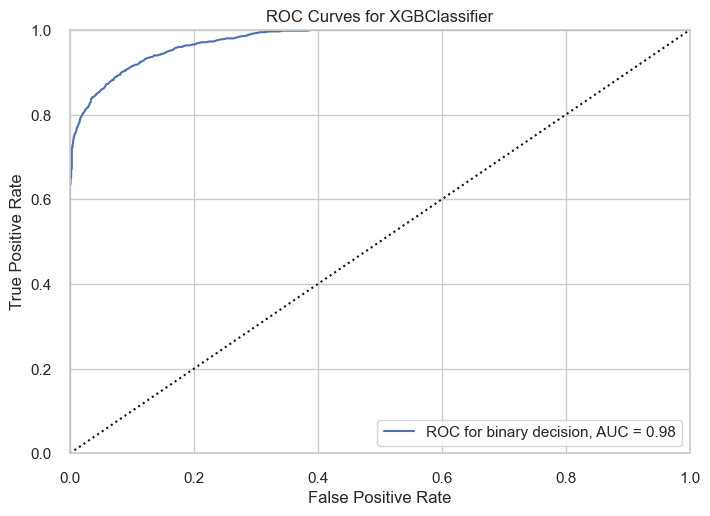

In [821]:
for model in models:
    visualizer = roc_auc(model, X_train, y_train, binary = True)

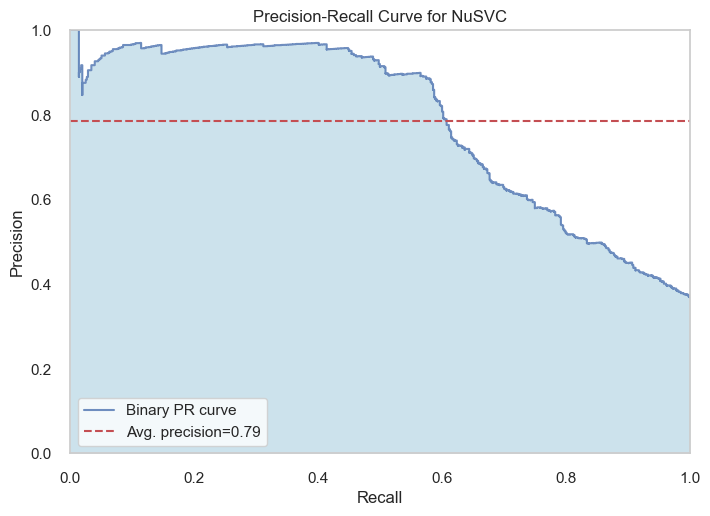

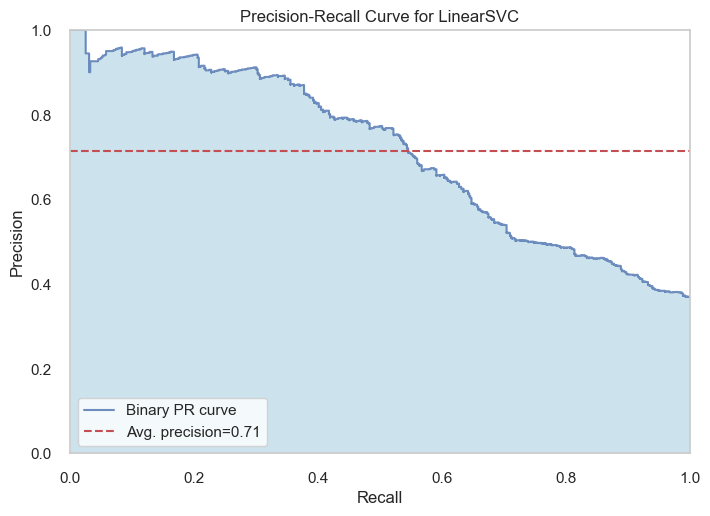

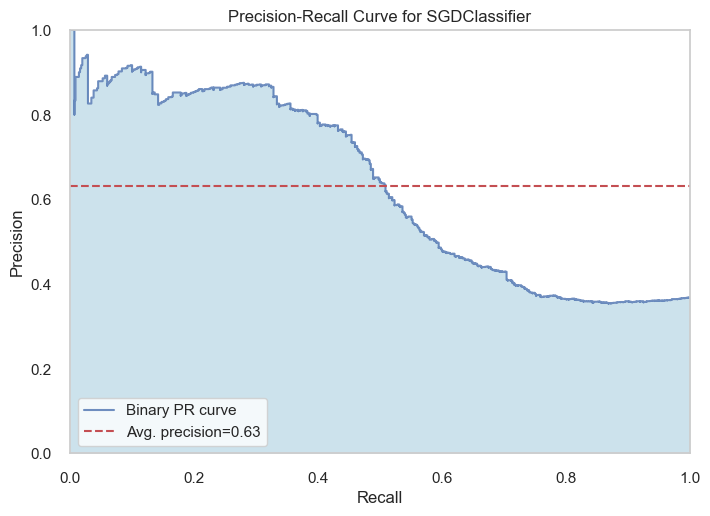

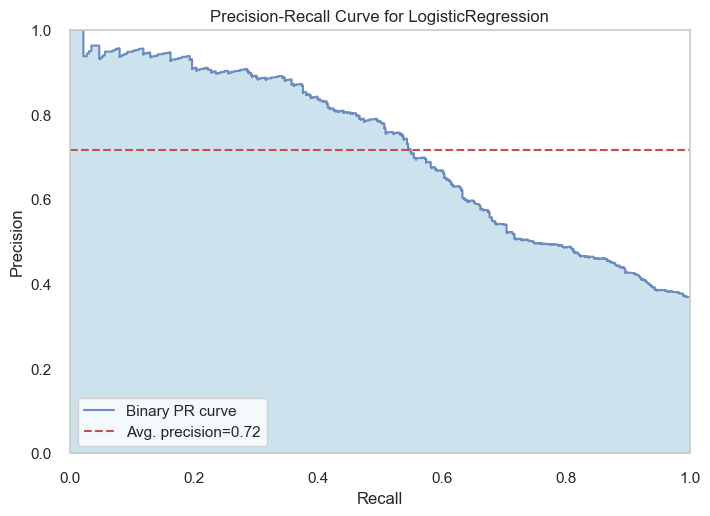

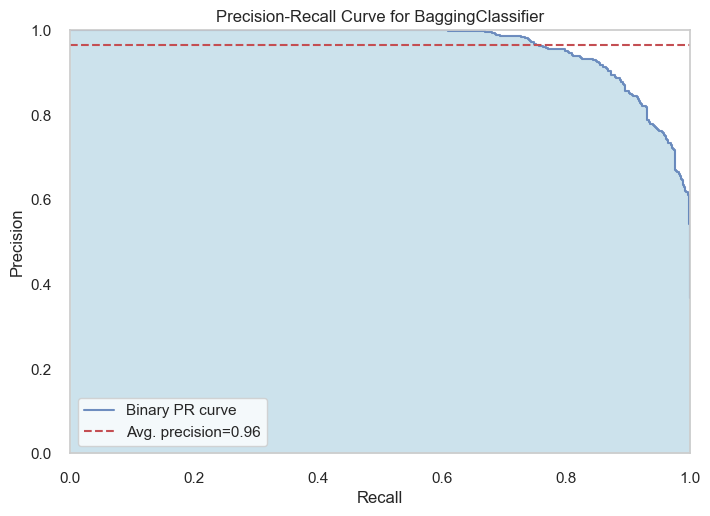

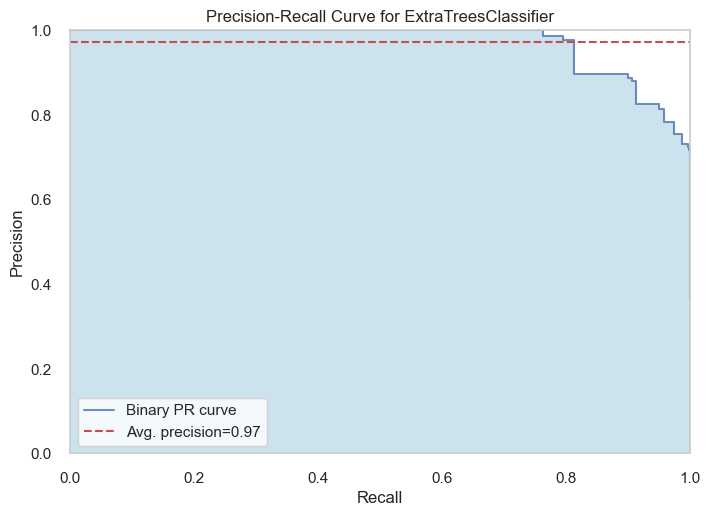

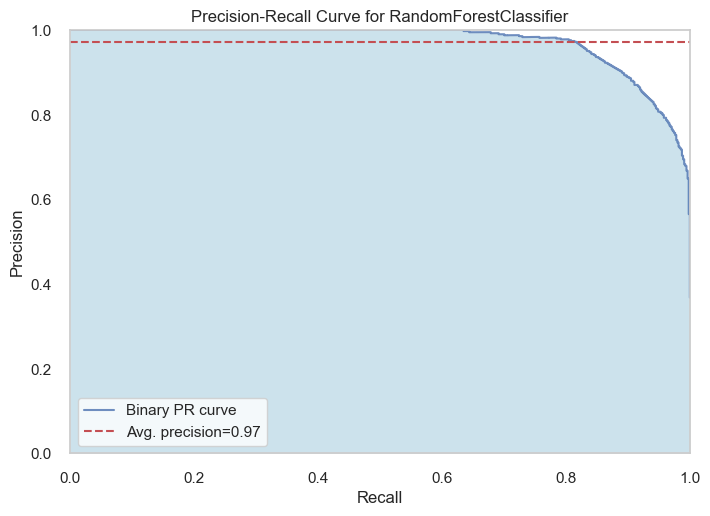

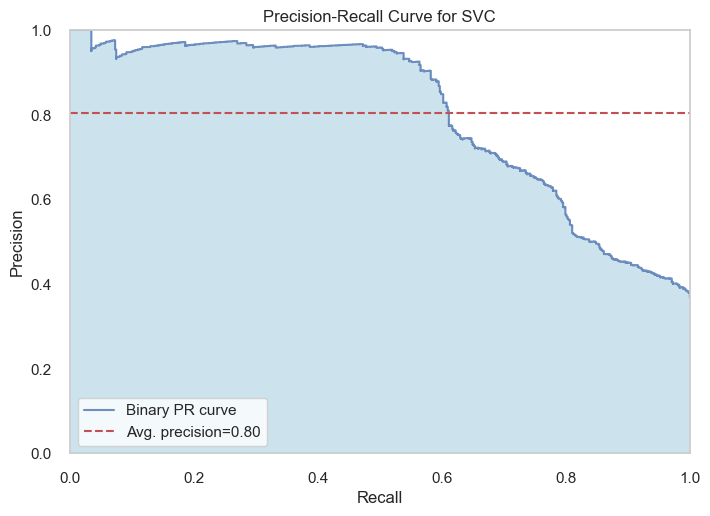

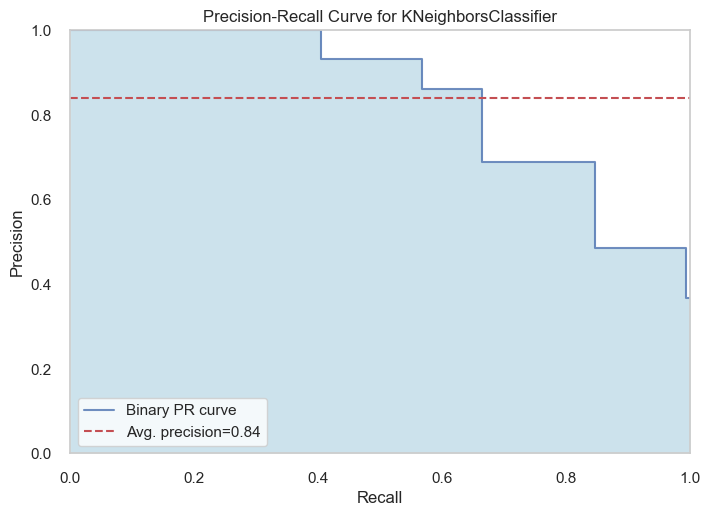

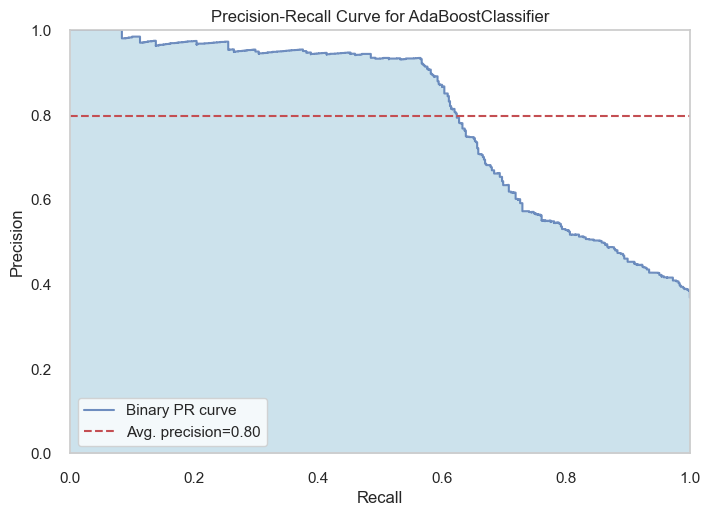

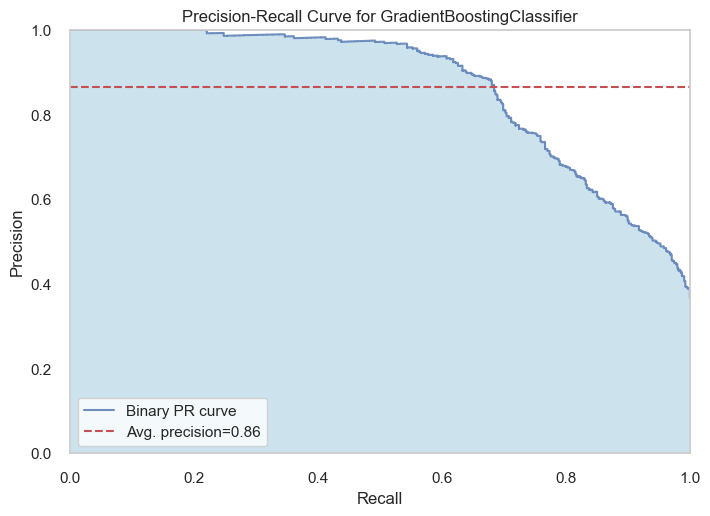

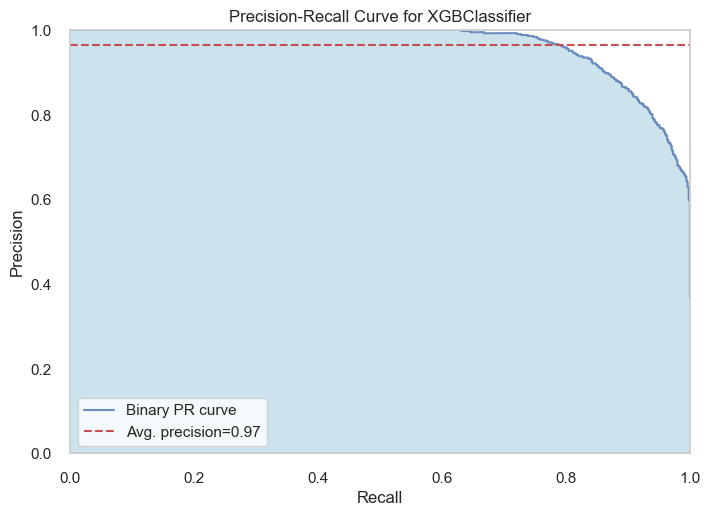

In [822]:
for model in models:
    visualizer = precision_recall_curve(model, X_train, y_train)

### Hyperparameter tuning

In this section results of hyperparameter tuning for selected classifiers will be presented. Three strategies will be applied for hyperparameter tuning - grid search, random search and search based on the algorithm implemented in the optuna library. 

First, parameters of selected classifiers were examined. 

In [823]:
for classifier in classifiers:
    print(classifier)
    print(classifier.get_params())
    print('')


LogisticRegression()
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RandomForestClassifier()
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

GradientBoostingClassifier()
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weigh

A list of dictionaries containing selected parameters for logistic regression, random forest, gradient boosting, support vector machines, and K-neighbors clustering classifiers was created.

In [824]:
params = [{
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    
    {'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))},
    
   {'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))},
    
    {'classifier__C': [0.1, 1, 10, 100, 1000], 
     'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'classifier__kernel': ['rbf']}, 
    
    {'classifier__n_neighbors': [3,5,7,9,11,13],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1,2]}]

#### Grid search:

Hyperparameter tuning based on the grid search strategy was performed and there results are seen in the output of teh code bellow. It can be seen that accuracy scores of all five classifiers were improved comparing with the scores of the same classifiers with the default parameters.

In [883]:
scores_grid = {}
scores_grid["model_name"] = []
scores_grid["a_score"] = []
scores_grid["f1_score"] = []
scores_grid["predictions"] = []

for classifier in classifiers:
   
    pipeline = Pipeline(steps = [
                   ('preprocessor', preprocessor),
                   ('classifier',classifier)
    ])
 
    clf = GridSearchCV(pipeline, params[classifiers.index(classifier)], scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True)
    clf.fit(X_train, y_train)
    prediction = clf.best_estimator_.predict(X_test)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores_grid["model_name"].append(f'{classifier.__class__.__name__}')
    scores_grid["a_score"].append(acc_sq)
    scores_grid["f1_score"].append(f1)
    scores_grid["predictions"].append(prediction)

LogisticRegression
LogisticRegression F1_score: 0.635
Model accuracy score: 0.781

RandomForestClassifier
RandomForestClassifier F1_score: 0.66
Model accuracy score: 0.787

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.731
Model accuracy score: 0.849

SVC
SVC F1_score: 0.707
Model accuracy score: 0.835

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.69
Model accuracy score: 0.823



#### Randomized search:

Hyperparameter tuning based on the random search strategy was performed and there results are seen in the output of teh code bellow. It can be seen that accuracy scores of all five classifiers were improved comparing with the scores of the same classifiers with the default parameters. However, the accuracy scores of this strategy are either equal or a bit lower comparing with the scores of the HPT by grid search strategy (see accuracy score of the Gradient Boosting classifier).

In [884]:
scores_rand = {}
scores_rand["model_name"] = []
scores_rand["a_score"] = []
scores_rand["f1_score"] = []
scores_rand["predictions"] = []


for classifier in classifiers:
   
    pipeline = Pipeline(steps = [
                   ('preprocessor', preprocessor),
                   ('classifier',classifier)
    ])
 
    random_rf = RandomizedSearchCV(pipeline, params[classifiers.index(classifier)], n_iter=10, 
                                   scoring='accuracy', cv=5, refit=True)
    random_rf.fit(X_train, y_train)
    prediction = random_rf.best_estimator_.predict(X_test)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores_rand["model_name"].append(f'{classifier.__class__.__name__}')
    scores_rand["a_score"].append(acc_sq)
    scores_rand["f1_score"].append(f1)
    scores_rand["predictions"].append(prediction)

LogisticRegression
LogisticRegression F1_score: 0.615
Model accuracy score: 0.771

RandomForestClassifier
RandomForestClassifier F1_score: 0.662
Model accuracy score: 0.783

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.731
Model accuracy score: 0.849

SVC
SVC F1_score: 0.7
Model accuracy score: 0.831

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.681
Model accuracy score: 0.817



#### Optuna solution:

In order to apply the algorithm of the HPT impemented by the Optuna library, transformed datasets for training and testing had to be extracted from the initial pipelines. 

In [3]:
X_pipe = pd.DataFrame(preprocessor.transform(X))
X_pipe_train = pd.DataFrame(preprocessor.transform(X_train))
X_pipe_test = pd.DataFrame(preprocessor.transform(X_test))
#X_pipe.columns = ['Age', 'AnnualIncome', 'FamilyMembers',
#                  'Employment Type', 'GraduateOrNot',"FrequentFlyer", 
 #                 "EverTravelledAbroad", 'ChronicDiseases']
X_pipe.head()

NameError: name 'pd' is not defined

In [1]:
X_pipe

NameError: name 'X_pipe' is not defined

The function 'objective' with classifiers' parameters, model fitting and predicting was created. 

In [839]:

def objective(trial):
    
    
    classifier_name = trial.suggest_categorical("classifier", ["LogisticRegression","SVC", 
                                                               "RandomForest","GradientBoosting",
                                                               "KNeighborsClassifier"])
    
    if classifier_name == "LogisticRegression":
        lg_penalty = trial.suggest_categorical("lg_penalty", ['l1', 'l2'])
        lg_c = trial.suggest_float('C', 0.1, 10.0)
        classifier_obj = LogisticRegression(penalty = lg_penalty, C=lg_c, solver="liblinear")
        classifier_obj.fit(X_pipe_train, y_train)
        
    elif classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 0.1, 1000, log =True)
        gamma = trial.suggest_float("gamma", 0.1, 1000, log=True)
        classifier_obj = SVC(C=svc_c, gamma=gamma, kernel='rbf')
        classifier_obj.fit(X_pipe_train, y_train)
        
        
    elif classifier_name == "RandomForest":
        max_features = trial.suggest_int("max_features", 6,32, step = 5)
        n_estimators = trial.suggest_int("n_estimators", 10,101, step = 10)
        max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
        max_samples = trial.suggest_float("max_samples",0.2, 1)
    
        classifier_obj = RandomForestClassifier(
            max_depth = max_depth,
            max_features = max_features,
            n_estimators = n_estimators,
            max_samples = max_samples,
            random_state = 42)
    
        classifier_obj.fit(X_pipe_train, y_train)
        
    elif classifier_name == "GradientBoosting":
        max_features_gr = trial.suggest_int("max_features_gr", 6,32, step = 5)
        n_estimators_gr = trial.suggest_int("n_estimators_gr", 10,101, step = 10)
        max_depth_gr = trial.suggest_int("rf_max_depth_gr", 2, 64, log=True)
       
        classifier_obj = GradientBoostingClassifier(
            max_depth = max_depth_gr,
            max_features = max_features_gr,
            n_estimators = n_estimators_gr,
            random_state = 42)
    
        classifier_obj.fit(X_pipe_train, y_train)
    else:
        n_neighbors = trial.suggest_int("n_neighbors", 3,13, step = 2)
        weights = trial.suggest_categorical("weights",['uniform', 'distance'])
        p = trial.suggest_int("p",1,2)
        classifier_obj = KNeighborsClassifier(
            n_neighbors=n_neighbors, weights=weights, p = p
        )
        classifier_obj.fit(X_pipe_train, y_train)
    
    y_pred = classifier_obj.predict(X_pipe_test)
    score = accuracy_score(y_test, y_pred)

    return score

The function was run with the maximization direction for 100 trials and the trial with the best accuracy score was presented. It appeared that the optuna solution was able to suggest the combination of parameters for the grandom forest classifier which generated the highest accuracy score (0.865) comaring to all other approaches.

In [840]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2023-06-22 09:41:29,762] A new study created in memory with name: no-name-4488f153-f071-4a51-8d7a-14ca35ea2406
[I 2023-06-22 09:41:29,859] Trial 0 finished with value: 0.8531187122736419 and parameters: {'classifier': 'RandomForest', 'max_features': 16, 'n_estimators': 80, 'rf_max_depth': 4, 'max_samples': 0.6006888507587089}. Best is trial 0 with value: 0.8531187122736419.
[I 2023-06-22 09:41:29,867] Trial 1 finished with value: 0.8148893360160966 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 9, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.8531187122736419.
[I 2023-06-22 09:41:30,346] Trial 2 finished with value: 0.7605633802816901 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 21, 'n_estimators_gr': 100, 'rf_max_depth_gr': 51}. Best is trial 0 with value: 0.8531187122736419.
[I 2023-06-22 09:41:30,399] Trial 3 finished with value: 0.8289738430583501 and parameters: {'classifier': 'SVC', 'svc_c': 18.677415051182404, 'ga

[I 2023-06-22 09:41:31,842] Trial 31 finished with value: 0.8551307847082495 and parameters: {'classifier': 'RandomForest', 'max_features': 11, 'n_estimators': 10, 'rf_max_depth': 3, 'max_samples': 0.8856279833434486}. Best is trial 15 with value: 0.8551307847082495.
[I 2023-06-22 09:41:31,870] Trial 32 finished with value: 0.8551307847082495 and parameters: {'classifier': 'RandomForest', 'max_features': 11, 'n_estimators': 20, 'rf_max_depth': 3, 'max_samples': 0.9752606598669542}. Best is trial 15 with value: 0.8551307847082495.
[I 2023-06-22 09:41:31,879] Trial 33 finished with value: 0.7585513078470825 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 3, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 0.8551307847082495.
[I 2023-06-22 09:41:31,898] Trial 34 finished with value: 0.8531187122736419 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 10, 'rf_max_depth': 5, 'max_samples': 0.7793128766239108}. Best is trial 1

[I 2023-06-22 09:41:33,070] Trial 62 finished with value: 0.8531187122736419 and parameters: {'classifier': 'RandomForest', 'max_features': 11, 'n_estimators': 20, 'rf_max_depth': 4, 'max_samples': 0.6656422902223136}. Best is trial 15 with value: 0.8551307847082495.
[I 2023-06-22 09:41:33,089] Trial 63 finished with value: 0.8511066398390342 and parameters: {'classifier': 'RandomForest', 'max_features': 11, 'n_estimators': 10, 'rf_max_depth': 6, 'max_samples': 0.6210805132759631}. Best is trial 15 with value: 0.8551307847082495.
[I 2023-06-22 09:41:33,106] Trial 64 finished with value: 0.8490945674044266 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 10, 'rf_max_depth': 3, 'max_samples': 0.7030374697649576}. Best is trial 15 with value: 0.8551307847082495.
[I 2023-06-22 09:41:33,373] Trial 65 finished with value: 0.7826961770623743 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 16, 'n_estimators_gr': 60, 'rf_max_depth_gr': 12}.

[I 2023-06-22 09:41:34,169] Trial 93 finished with value: 0.8571428571428571 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 10, 'rf_max_depth': 5, 'max_samples': 0.8895649806287448}. Best is trial 91 with value: 0.8571428571428571.
[I 2023-06-22 09:41:34,191] Trial 94 finished with value: 0.8490945674044266 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 10, 'rf_max_depth': 6, 'max_samples': 0.9690803250131732}. Best is trial 91 with value: 0.8571428571428571.
[I 2023-06-22 09:41:34,220] Trial 95 finished with value: 0.8511066398390342 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 20, 'rf_max_depth': 5, 'max_samples': 0.8729375471325221}. Best is trial 91 with value: 0.8571428571428571.
[I 2023-06-22 09:41:34,250] Trial 96 finished with value: 0.8571428571428571 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 20, 'rf_max_depth': 5, 'max_samples': 0.

Best Score:  0.8571428571428571
Best Params: 
  classifier: RandomForest
  max_features: 6
  n_estimators: 10
  rf_max_depth: 5
  max_samples: 0.8853559749550229


The Optuna solution after feature selection based on random approach suggested Random Forest classifier with certain parameters as the one which generates the highest accuracy score (0.857). 

### Feature selection

In this section feature selection approaches are presented. One approach is random search of features which is implemented by the function 'find_inputs'. Random combinations of features are selected from the list of features and classification models are fitted on these combinations, predictions are generated for a number of times (e.g. 10000). Unique combinations and accuracy scores are saved in a dictionary and then the combination with the highest accuracy score is selected. However, this approach is very time-consuming, thus, it was possible to apply this function only for the logistic regression classifier.

#### Random feature selection:

In [528]:
def find_inputs(model, x_data, y_data, x_test_data, y_test_data, list_length): 
    data = {}
    var_list = [0 + i * 1 for i in range(list_length)]
    i_list = [[]]
    u = 0
    while u < 5000:
        i = random.choices(var_list[:-1], k=random.choice(var_list[1:]))
        i = list(np.unique(i))
        x = x_data.iloc[:,i]
        mod = model.fit(x, y_data)
        prediction = mod.predict(x_test_data.iloc[:,i])
        acc_sq = accuracy_score(prediction, y_test_data)
        if i not in i_list:
            data[f"{i}"] = acc_sq.round(3)
            i_list.append(i)
        u+=1
    
    print('Combinations of independent variables for the model with the highest accuracy scores:')
    print(f'{max(data, key=data.get)}')
    print('Accuracy score:') 
    print(data[f'{max(data, key=data.get)}'])
    return data

It can be seen that accuracy score did not improve with the combination with removed age, chronic diseases and family members variables.

In [529]:
data = find_inputs(LogisticRegression(), X_pipe_train, y_train, X_pipe_test, y_test, 8)

Combinations of independent variables for the model with the highest accuracy scores:
[0, 1, 2, 3, 5, 6]
Accuracy score:
0.813


In [530]:
res = dict(sorted(data.items(), key = lambda x: x[1], reverse = True)[:10])
 
print(f"Top 10 combinations of independent variables and coeficients of determination: \n{res}")

Top 10 combinations of independent variables and coeficients of determination: 
{'[0, 1, 2, 3, 5, 6]': 0.813, '[1, 3, 4, 5, 6]': 0.811, '[0, 1, 2, 5, 6]': 0.811, '[1, 4, 5, 6]': 0.811, '[1, 3, 4, 6]': 0.809, '[1, 3, 5, 6]': 0.809, '[1, 2, 3, 4, 5, 6]': 0.809, '[1, 2, 3, 5, 6]': 0.809, '[1, 2, 5, 6]': 0.809, '[0, 1, 3, 5, 6]': 0.809}


Ths combination of features was tested with pipelines for classifiers in the long list without the HPT and with the Optuna HPT. It was found that this combination of feature variables does not generate better accuracy scores comparing with the combination with all feature variables. 

In [885]:
numeric_features = ['Age', 'AnnualIncome', 'FamilyMembers']
binary_features = ['Employment Type',"FrequentFlyer", "EverTravelledAbroad"]


In [886]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('binary', binary_transformer, binary_features),
]) 

In [887]:
scores_rfeatures = {}
scores_rfeatures["model_name"] = []
scores_rfeatures["a_score"] = []
scores_rfeatures["f1_score"] = []
scores_rfeatures["predictions"] = []

for classifier in classifiers_full:
    pipeline = Pipeline(steps = [
                   ('preprocessor', preprocessor),
                   ('classifier',classifier)
    ])
    model = pipeline.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores_rfeatures["model_name"].append(f'{classifier.__class__.__name__}')
    scores_rfeatures["a_score"].append(acc_sq)
    scores_rfeatures["f1_score"].append(f1)
    scores_rfeatures["predictions"].append(prediction)

NuSVC
NuSVC F1_score: 0.721
Model accuracy score: 0.841

LinearSVC
LinearSVC F1_score: 0.644
Model accuracy score: 0.809

SGDClassifier
SGDClassifier F1_score: 0.649
Model accuracy score: 0.813

LogisticRegression
LogisticRegression F1_score: 0.662
Model accuracy score: 0.813

BaggingClassifier
BaggingClassifier F1_score: 0.648
Model accuracy score: 0.767

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.634
Model accuracy score: 0.773

RandomForestClassifier
RandomForestClassifier F1_score: 0.66
Model accuracy score: 0.787

SVC
SVC F1_score: 0.721
Model accuracy score: 0.843

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.664
Model accuracy score: 0.797

AdaBoostClassifier
AdaBoostClassifier F1_score: 0.693
Model accuracy score: 0.831

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.726
Model accuracy score: 0.845

XGBClassifier
XGBClassifier F1_score: 0.669
Model accuracy score: 0.789



In [848]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2023-06-22 09:43:39,097] A new study created in memory with name: no-name-67934345-92b4-4d94-b67a-a914bf4a52c7
[I 2023-06-22 09:43:39,184] Trial 0 finished with value: 0.7303822937625755 and parameters: {'classifier': 'SVC', 'svc_c': 0.866094908039738, 'gamma': 140.35699170021215}. Best is trial 0 with value: 0.7303822937625755.
[I 2023-06-22 09:43:39,189] Trial 1 finished with value: 0.8028169014084507 and parameters: {'classifier': 'LogisticRegression', 'lg_penalty': 'l1', 'C': 5.649075054304556}. Best is trial 1 with value: 0.8028169014084507.
[I 2023-06-22 09:43:39,191] Trial 2 finished with value: 0.8028169014084507 and parameters: {'classifier': 'LogisticRegression', 'lg_penalty': 'l2', 'C': 7.598028947400741}. Best is trial 1 with value: 0.8028169014084507.
[I 2023-06-22 09:43:39,200] Trial 3 finished with value: 0.8148893360160966 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 9, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.814889336016

[I 2023-06-22 09:43:40,330] Trial 33 finished with value: 0.8470824949698189 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 16, 'n_estimators_gr': 100, 'rf_max_depth_gr': 2}. Best is trial 26 with value: 0.8470824949698189.
[I 2023-06-22 09:43:40,389] Trial 34 finished with value: 0.8490945674044266 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 21, 'n_estimators_gr': 80, 'rf_max_depth_gr': 3}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:43:40,456] Trial 35 finished with value: 0.8410462776659959 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 26, 'n_estimators_gr': 70, 'rf_max_depth_gr': 4}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:43:40,531] Trial 36 finished with value: 0.8410462776659959 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 21, 'n_estimators_gr': 80, 'rf_max_depth_gr': 4}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 0

[I 2023-06-22 09:43:42,454] Trial 66 finished with value: 0.8309859154929577 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 26, 'n_estimators_gr': 80, 'rf_max_depth_gr': 5}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:43:42,599] Trial 67 finished with value: 0.7947686116700201 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 6, 'n_estimators_gr': 60, 'rf_max_depth_gr': 8}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:43:42,985] Trial 68 finished with value: 0.7706237424547284 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 11, 'n_estimators_gr': 70, 'rf_max_depth_gr': 16}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:43:43,048] Trial 69 finished with value: 0.8430583501006036 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 6, 'n_estimators_gr': 90, 'rf_max_depth_gr': 3}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:

[I 2023-06-22 09:43:45,022] Trial 98 finished with value: 0.8490945674044266 and parameters: {'classifier': 'RandomForest', 'max_features': 6, 'n_estimators': 60, 'rf_max_depth': 7, 'max_samples': 0.5027808879271672}. Best is trial 34 with value: 0.8490945674044266.
[I 2023-06-22 09:43:45,030] Trial 99 finished with value: 0.7585513078470825 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 3, 'weights': 'distance', 'p': 2}. Best is trial 34 with value: 0.8490945674044266.


Best Score:  0.8490945674044266
Best Params: 
  classifier: GradientBoosting
  max_features_gr: 21
  n_estimators_gr: 80
  rf_max_depth_gr: 3


The Optuna solution after feature selection based on random approach suggested Gradient Boosting classifier with certain parameters as the one which generates the highest accuracy score (0.849). 

#### Selection based on feature importances:

The next approach for feature selection was based on the identification of the most important features. Plots for feature importances of different classifiers are presented bellow.

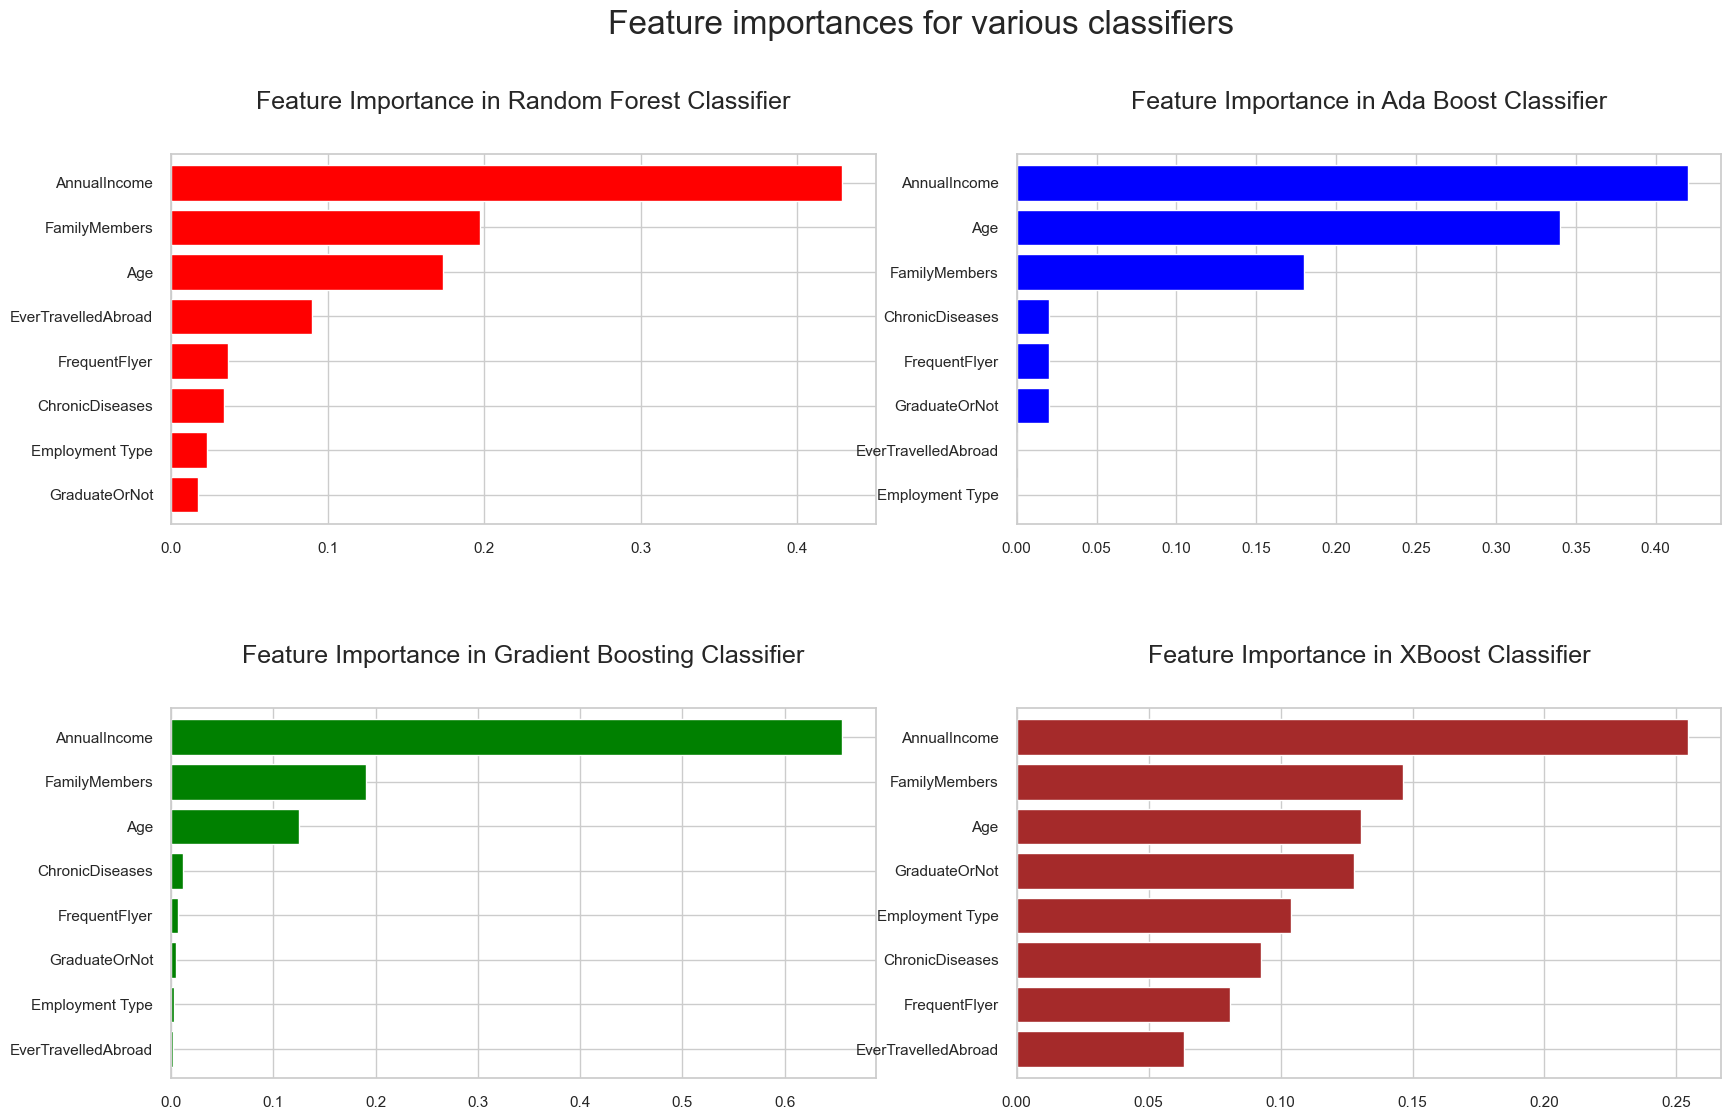

In [860]:
indices = [6, 9, 10,11]
models_new = [models[index] for index in indices]
model_list = ['Random Forest Classifier',
              'Ada Boost Classifier','Gradient Boosting Classifier','XBoost Classifier']
color_list = ['red','blue','green','brown']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Feature importances for various classifiers", fontsize=24, y=1)

for model, ax in zip(models_new, axs.ravel()):
    pd.Series(model[-1].feature_importances_, X_pipe.columns).\
    sort_values(ascending=True).plot.barh(width=0.8,ax = ax,color=color_list[models_new.index(model)])
    ax.set_title(f'Feature Importance in {model_list[models_new.index(model)]}', fontsize=18, y=1.1)
    ax.set_xlabel("")

plt.show()


It can be seen that the most important feature variables for different classifiers are 'age', 'employment type' and 'ever travelled abroad'. These variables were selected for pipelines. 

In [888]:
numeric_features = ['Age','AnnualIncome','FamilyMembers']
binary_features = []


In [889]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('binary', binary_transformer, binary_features)
]) 

In [890]:
scores_ifeatures = {}
scores_ifeatures["model_name"] = []
scores_ifeatures["a_score"] = []
scores_ifeatures["f1_score"] = []
scores_ifeatures["predictions"] = []

for classifier in classifiers_full:
    pipeline = Pipeline(steps = [
                   ('preprocessor', preprocessor),
                   ('classifier',classifier)
    ])
    model = pipeline.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print (classifier.__class__.__name__)
    f1 = f1_score(y_test, prediction).round(3)
    print("{} F1_score: {}".format(classifier.__class__.__name__, f1))
    acc_sq = accuracy_score(y_test, prediction).round(3)
    print (f'Model accuracy score: {acc_sq}')
    print('')
    scores_ifeatures["model_name"].append(f'{classifier.__class__.__name__}')
    scores_ifeatures["a_score"].append(acc_sq)
    scores_ifeatures["f1_score"].append(f1)
    scores_ifeatures["predictions"].append(prediction)

NuSVC
NuSVC F1_score: 0.702
Model accuracy score: 0.829

LinearSVC
LinearSVC F1_score: 0.633
Model accuracy score: 0.779

SGDClassifier
SGDClassifier F1_score: 0.494
Model accuracy score: 0.744

LogisticRegression
LogisticRegression F1_score: 0.615
Model accuracy score: 0.771

BaggingClassifier
BaggingClassifier F1_score: 0.654
Model accuracy score: 0.781

ExtraTreesClassifier
ExtraTreesClassifier F1_score: 0.635
Model accuracy score: 0.771

RandomForestClassifier
RandomForestClassifier F1_score: 0.65
Model accuracy score: 0.777

SVC
SVC F1_score: 0.707
Model accuracy score: 0.833

KNeighborsClassifier
KNeighborsClassifier F1_score: 0.662
Model accuracy score: 0.797

AdaBoostClassifier
AdaBoostClassifier F1_score: 0.672
Model accuracy score: 0.821

GradientBoostingClassifier
GradientBoostingClassifier F1_score: 0.731
Model accuracy score: 0.849

XGBClassifier
XGBClassifier F1_score: 0.66
Model accuracy score: 0.791



In [908]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2023-06-22 10:30:34,235] A new study created in memory with name: no-name-d51b37e3-11f9-488e-8392-be8e4017d88b
[I 2023-06-22 10:30:34,245] Trial 0 finished with value: 0.8028169014084507 and parameters: {'classifier': 'LogisticRegression', 'lg_penalty': 'l2', 'C': 9.34638076663719}. Best is trial 0 with value: 0.8028169014084507.
[I 2023-06-22 10:30:34,258] Trial 1 finished with value: 0.8169014084507042 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 11, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.8169014084507042.
[I 2023-06-22 10:30:34,268] Trial 2 finished with value: 0.7987927565392354 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 5, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.8169014084507042.
[I 2023-06-22 10:30:34,271] Trial 3 finished with value: 0.8028169014084507 and parameters: {'classifier': 'LogisticRegression', 'lg_penalty': 'l2', 'C': 4.907309660031335}. Best is trial 1 with value: 0.8169

[I 2023-06-22 10:30:35,894] Trial 32 finished with value: 0.8490945674044266 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 26, 'n_estimators_gr': 40, 'rf_max_depth_gr': 3}. Best is trial 24 with value: 0.8490945674044266.
[I 2023-06-22 10:30:35,903] Trial 33 finished with value: 0.7806841046277666 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'distance', 'p': 1}. Best is trial 24 with value: 0.8490945674044266.
[I 2023-06-22 10:30:35,939] Trial 34 finished with value: 0.8490945674044266 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 26, 'n_estimators_gr': 40, 'rf_max_depth_gr': 3}. Best is trial 24 with value: 0.8490945674044266.
[I 2023-06-22 10:30:35,945] Trial 35 finished with value: 0.8028169014084507 and parameters: {'classifier': 'LogisticRegression', 'lg_penalty': 'l1', 'C': 0.19330924128585458}. Best is trial 24 with value: 0.8490945674044266.
[I 2023-06-22 10:30:35,953] Trial 36 finished with

[I 2023-06-22 10:30:36,964] Trial 64 finished with value: 0.8531187122736419 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 16, 'n_estimators_gr': 20, 'rf_max_depth_gr': 4}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10:30:37,000] Trial 65 finished with value: 0.8450704225352113 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 16, 'n_estimators_gr': 20, 'rf_max_depth_gr': 6}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10:30:37,026] Trial 66 finished with value: 0.8531187122736419 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 11, 'n_estimators_gr': 20, 'rf_max_depth_gr': 4}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10:30:37,048] Trial 67 finished with value: 0.8490945674044266 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 16, 'n_estimators_gr': 10, 'rf_max_depth_gr': 6}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10

[I 2023-06-22 10:30:37,799] Trial 96 finished with value: 0.7505030181086519 and parameters: {'classifier': 'SVC', 'svc_c': 25.57931068465522, 'gamma': 3.065204814881312}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10:30:37,817] Trial 97 finished with value: 0.8551307847082495 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 21, 'n_estimators_gr': 10, 'rf_max_depth_gr': 4}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10:30:38,165] Trial 98 finished with value: 0.7585513078470825 and parameters: {'classifier': 'GradientBoosting', 'max_features_gr': 16, 'n_estimators_gr': 70, 'rf_max_depth_gr': 59}. Best is trial 50 with value: 0.8551307847082495.
[I 2023-06-22 10:30:38,203] Trial 99 finished with value: 0.8551307847082495 and parameters: {'classifier': 'RandomForest', 'max_features': 31, 'n_estimators': 40, 'rf_max_depth': 4, 'max_samples': 0.37743611503681596}. Best is trial 50 with value: 0.8551307847082495.


Best Score:  0.8551307847082495
Best Params: 
  classifier: GradientBoosting
  max_features_gr: 21
  n_estimators_gr: 10
  rf_max_depth_gr: 4


The Optuna solution after feature selection based on feature importances suggested Gradient Boosting classifier with certain parameters as the one which generates the highest accuracy score (0.855). 

It can be observed that classifiers with combinations of feature variables based on feature importances do not generate better predictions - both without HPT and with Optima HPT. Thus it can be concluded that the initial set of features is the most optimal because it generates the best predictions of decisions to buy or not to buy the travel insurance package.

### Comparison of classifiers with and withouth hyperparameter tuning and feature selection

Finally, accuracy scores generated from different classifiers (except the Optuna solution) are compared by concating the accuracy scores into a single dataframe and plotting them.

In [893]:
scores_rand = pd.DataFrame(scores_rand).set_index('model_name')
scores_grid = pd.DataFrame(scores_grid).set_index('model_name')
scores_rfeatures = pd.DataFrame(scores_rfeatures).set_index('model_name')
scores_ifeatures = pd.DataFrame(scores_ifeatures).set_index('model_name')

In [931]:
ascores_full = pd.concat([scores.loc[:,'a_score'],scores_rfeatures.loc[:,'a_score'],
                          scores_ifeatures.loc[:,'a_score'], scores_grid.loc[:,'a_score'], 
                          scores_grid.loc[:,'a_score']], axis=1)
ascores_full.columns =['a_score_full','a_score_rfeatures','a_score_ifeatures','a_score_rand','a_score_grid']


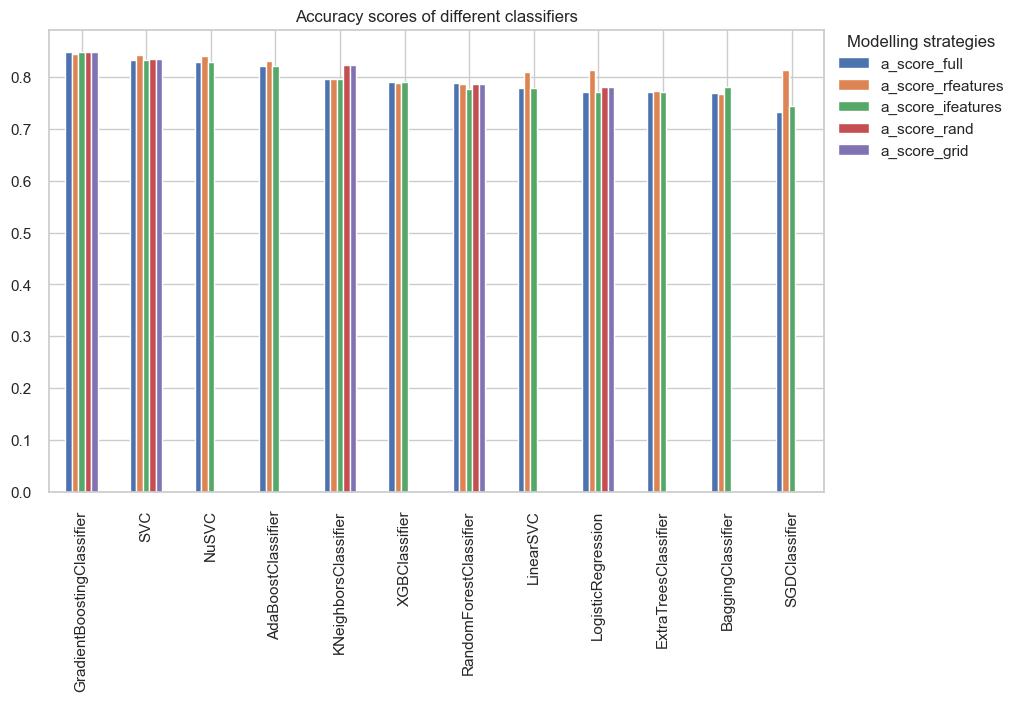

In [932]:
sns.set(style='whitegrid')
ascores_full.plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy scores of different classifiers')
plt.xticks(rotation=90)
plt.legend(title='Modelling strategies', bbox_to_anchor=(1, 1.02),
                     loc='upper left')  
plt.xlabel('')
plt.ylabel('')
plt.show()

It can be observed that for all approaches the Gradient Boosting classifier generates the highest accuracy scores (aprroximately 8.5) and they do not differ much depending on the modelling approach (either with default parameters with all features or after feature selection and hyperparameter tuning). However, for other classifiers hyperparameter tuning and feature selection has some effect on accuracy scores.

## Conclusions

The following conclusions can be made from the results of data analysis of the Travel Insurance dataset:

1. Higher proportions of customers 
- working in the private sector, 
- having higher numbers of family members, 
- who are frequent flyers, 
- who ever travelled abroad 

bought the travel insurance package than those who are not or did not (the differences are statistically significant).
  
2. Graduation and having chronic diseases do not have a statistically significant effect on the buying decision.
3. Older and richer customers bought the travel insurance package more often than those who did not (the differences are statisticall signifficant).
4. The most important features for predicting decisions to buy or not to buy the travel insurance package are age, annual income and a number of family members. 
5. The classifiers which the best predict decisions of customers to buy the travel insurance package are the Gradient Boosting classifier (Optuna solution HPT after feature selection by the most important features; accuracy score - 0.855) and the Random Forest classifier (Optuna solution HPT with full features; accuracy score - 8.57).
6. the classifiers better predict decisions not to buy the travel insurance package (for example, recall for "No" is 9.55 by the Gradient Boosting classifier) than decision not to buy it.
7. It could be recommended for managers of the travel agency to focus on this segment of customers while marketing the travel insurance package (as there are more chances that they will buy it) - frequent flyers who travel abroad, work in the private sector or self-employed, of older age, with higher annual income and higher numbers of family members. 


#### Limitations:

- Cross-validation was not performed in this analysis.
- Hyperparameter tuning was not performed for all classifiers.
- Random search of features was performed only for the Logistic Regression classifier.

#### Suggestions for improvement:

- To perform analysis which is mentioned as limitations. 

## References

Travel Insurance Prediction Data, https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data